<a href="https://colab.research.google.com/github/IvanTrujillo7/Entrega-final-Data-Science-II/blob/main/Proyecto_final_Data_Science_II_CristianTrujillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

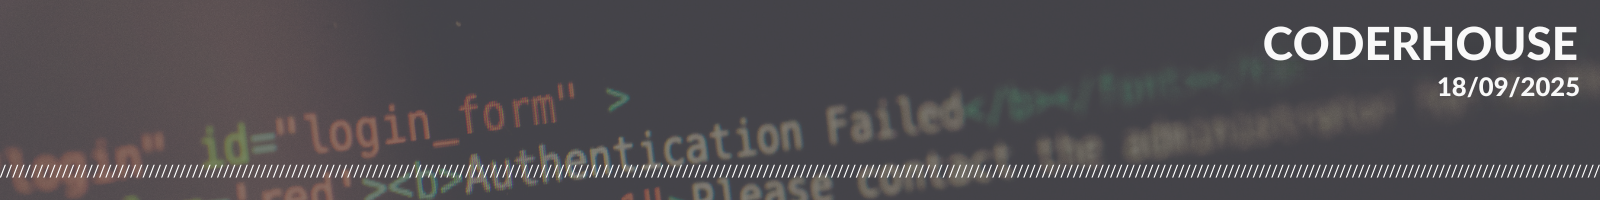

# PROYECTO FINAL DATA SCIENCE II
**Cristian Iván Trujillo torres**

# I Introducción: Médicamentos vitales no disponibles en Colombia

**Médicamentos vitales no disponibles en Colombia**

Durante los primeros meses del año 2025 en Colombia se han vivido fuertes inundaciones, precipitaciones y demás situaciones que la médicina debe enfrentar, ya que la cantidad de ciudadanos afectados por los niveles de humedad y falta de servicios en varios municipios ha pasado a ser una prioridad, es así que por el bienestar de las personas prevenir los médicamentos que sean vitales en los proximos meses así como las afecciones y cantidades que se requieran será vital para el año 2026.

El Instituto Nacional de Vigilancia de Medicamentos y Alimentos presenta al mes los medicamentos como aquellos indispensables e irremplazables para salvaguardar la vida o aliviar el sufrimiento de un paciente o un grupo de pacientes y que por condiciones de baja rentabilidad en su comercialización, no se encuentran disponibles en el país, o las cantidades no son suficientes.

Es por eso que este análisis buscará primeramente de manera descriptiva comprender el comportamiento historico de las solicitudes realizadas por las diferentes empresas del sector de la salud entre diciembre de 2024 y julio de 2025.

Este análisis descriptivo abarca el comportamiento en la solicitud de medicamentos en el régimen subsidiado en Colombia, utilizando una muestra de 1000 registros del conjunto de datos oficial disponible en datos.gov.co. El objetivo principal es identificar patrones en la demanda de medicamentos con base en el diagnóstico clínico (patología reportada) y el principio activo de los productos formulados. Estos resultados serán las bases para el modelo de regresión objetivo.

### I.I Objetivo del análisis

Llevar acábo un análisis de regresión en un periodo de 1 mes que proyecte las principales patologías que se tratarán en Colombia en 2026 y determine los 5 principios activos más solicitados, con el fin de generar información estratégica y útil para la planificación del sector salud colombiano.

### I.II Preguntas Clave

Es así que con el fin de comprender a cabalidad las diferentes relaciones y patrones de comportamiento de las solicitudes surgen las siguientes preguntas de ínteres sobre la muestra tomada:


1.   **¿Que enfermedades han sido mayormente reportadas en los usos del medicamento a través de los últimos meses?**

1.   **¿Que comportamiento tuvieron los medicamentos que no tienen un codigo IUM?**
1.   **¿Existe relación entre la forma farmaceutica del medicamento y la cantidad solicitada?**
1.   **¿Hay relación entre el tipo de solicitud y la enfermedad que solicita tratar?**
1.   **¿Qué principios activos han sido más formulados por mes y para qué tipo de patologías?**

# II Análisis exploratorio

#### II.I Instalación de librerias





In [1]:
pip install unidecode

In [2]:
pip install imageio[ffmpeg]


In [3]:
!pip install ydata-profiling

In [4]:
pip install prince

In [5]:
pip install adjustText

In [6]:
pip install catboost

### II.II Importación de librerias

In [7]:
#Importación de todas las librerias usadas en el análisis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import prince
from matplotlib import cm
from google.colab import files
from matplotlib import animation
import adjustText as adjust_text
from adjustText import adjust_text
from IPython.display import HTML
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics.pairwise import euclidean_distances
from ydata_profiling import ProfileReport
from google.colab import files
from scipy.stats import f_oneway, kruskal
from scipy.stats import chi2_contingency
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error,
    mean_absolute_percentage_error, median_absolute_error, max_error)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

### II.III Data Wrangling

In [8]:
#Obtención de la api #

url = "https://www.datos.gov.co/resource/sdmr-tfmf.csv?$limit=9000"
csv = pd.read_csv(url)
df = pd.DataFrame(csv)

Se procede a realizar un anális breve y géneral de los datos antes de continuar con la eliminación de nulos, duplicados, etc.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8942 entries, 0 to 8941
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fecha_de_autorizaci_n           8942 non-null   object 
 1   tipo_de_solicitud               8942 non-null   object 
 2   solicitante_importador          8939 non-null   object 
 3   ium                             8939 non-null   object 
 4   principio_activo1               8942 non-null   object 
 5   concentraci_n_delmedicamento1   8903 non-null   object 
 6   unidad_medida1                  8844 non-null   object 
 7   principio_activo2               8921 non-null   object 
 8   concentraci_n_del_medicamento2  8923 non-null   object 
 9   unidad_medida2                  8921 non-null   object 
 10  forma_farmac_utica              8907 non-null   object 
 11  nombre_comercial_               8941 non-null   object 
 12  cantidad_solicitada             88

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cantidad_solicitada,8884.0,2996.902071,14135.254381,1.0,6.0,20.0,308.0,304475.0


In [11]:
df.head()

,fecha_de_autorizaci_n,tipo_de_solicitud,solicitante_importador,ium,principio_activo1,concentraci_n_delmedicamento1,unidad_medida1,principio_activo2,concentraci_n_del_medicamento2,unidad_medida2,forma_farmac_utica,nombre_comercial_,cantidad_solicitada,presentaci_n_comercial,diagnostico_cie_1no_reporta,c_digo_diagnostico_cie_10
0,2025-08-06T05:00:00.000,MÁS DE UN PACIENTE,PISA FARMACÉUTICA DE COLOMBIA S.A.,1L1005651000100,LIDOCAÍNA CLORHIDRATO,10,mg/mL,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,PISACAÍNA,15180.0,CAJAS X UN FRASCO AMPULA X 50 mL,ANESTESIA DE LA PIEL,R200
1,2025-08-06T05:00:00.000,MÁS DE UN PACIENTE,PISA FARMACÉUTICA DE COLOMBIA S.A.,1B1024501002100,BUPIVACAINA CLORHIDRATO,5,mg/mL,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,BUVACAINA,24353.0,CAJAS CON UNA (1) AMPOLLETA X 10 mL,ANESTÉSICO,NO REPORTADO
2,2025-08-06T05:00:00.000,MÁS DE UN PACIENTE,AVALON PHARMACEUTICAL SA,1H1027911001100,VACUNA HEPATITIS B –VIRUS INACTIVADO- ANTÍGENO...,20,µg/Dosis (1ml),NO APLICA,NO APLICA,NO APLICA,SUSPENSION INYECTABLE,REVAC- B+,1171.0,CAJA X (1) VIAL DE 1 ml.,NO REPORTADO,NO REPORTADO
3,2025-08-06T05:00:00.000,MÁS DE UN PACIENTE,AVALON PHARMACEUTICAL SA,1H1027911001100,VACUNA HEPATITIS B –VIRUS INACTIVADO- ANTÍGENO...,20,µg/Dosis (1ml),NO APLICA,NO APLICA,NO APLICA,SUSPENSION INYECTABLE,REVAC- B+,14359.0,CAJA X (1) VIAL DE 1 ml.,NO REPORTADO,NO REPORTADO
4,2025-08-06T05:00:00.000,MÁS DE UN PACIENTE,HOLLAND GROUP SAS,1T1024151013100,TRINITRATO DE GLICEROL,5,mg/mL,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,NITROCAN 50,1600.0,CAJAS X 5 AMPOLLAS X 10 mL,"ANGINA DE PECHO, NO ESPECIFICADA",I209


In [12]:
# Al ser valores tan especificos los nulos no se pueden remplazar de modo que se eliminan todos #
df_clean = df.dropna()

In [13]:
# Se cambían los tipos de datos para un mejor uso #

df_clean.info()
print(df_clean.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 8756 entries, 0 to 8941
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fecha_de_autorizaci_n           8756 non-null   object 
 1   tipo_de_solicitud               8756 non-null   object 
 2   solicitante_importador          8756 non-null   object 
 3   ium                             8756 non-null   object 
 4   principio_activo1               8756 non-null   object 
 5   concentraci_n_delmedicamento1   8756 non-null   object 
 6   unidad_medida1                  8756 non-null   object 
 7   principio_activo2               8756 non-null   object 
 8   concentraci_n_del_medicamento2  8756 non-null   object 
 9   unidad_medida2                  8756 non-null   object 
 10  forma_farmac_utica              8756 non-null   object 
 11  nombre_comercial_               8756 non-null   object 
 12  cantidad_solicitada             8756 no

In [14]:
df_clean['fecha_de_autorizaci_n'] = pd.to_datetime(df_clean['fecha_de_autorizaci_n'], errors='coerce')

categorical_columns = [
    'tipo_de_solicitud',
    'solicitante_importador',
    'ium',
    'principio_activo1',
    'unidad_medida1',
    'principio_activo2',
    'unidad_medida2',
    'forma_farmac_utica',
    'nombre_comercial_',
    'presentaci_n_comercial',
    'diagnostico_cie_1no_reporta',
    'c_digo_diagnostico_cie_10'
]

for i in categorical_columns:
    df_clean[i] = df_clean[i].astype('category')

df_clean['cantidad_solicitada'] = pd.to_numeric(df_clean['cantidad_solicitada'], errors='coerce')

df_clean['concentraci_n_delmedicamento1'] = df_clean['concentraci_n_delmedicamento1'].astype(str)

df_clean['concentraci_n_del_medicamento2'] = df_clean['concentraci_n_del_medicamento2'].astype(str)

# Verificamos las transformaciones #
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8756 entries, 0 to 8941
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   fecha_de_autorizaci_n           8756 non-null   datetime64[ns]
 1   tipo_de_solicitud               8756 non-null   category      
 2   solicitante_importador          8756 non-null   category      
 3   ium                             8756 non-null   category      
 4   principio_activo1               8756 non-null   category      
 5   concentraci_n_delmedicamento1   8756 non-null   object        
 6   unidad_medida1                  8756 non-null   category      
 7   principio_activo2               8756 non-null   category      
 8   concentraci_n_del_medicamento2  8756 non-null   object        
 9   unidad_medida2                  8756 non-null   category      
 10  forma_farmac_utica              8756 non-null   category      
 11  nombre_co

/tmp/ipython-input-1528128760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['fecha_de_autorizaci_n'] = pd.to_datetime(df_clean['fecha_de_autorizaci_n'], errors='coerce')
/tmp/ipython-input-1528128760.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[i] = df_clean[i].astype('category')
/tmp/ipython-input-1528128760.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [15]:
df_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
fecha_de_autorizaci_n,8756,2022-05-11 06:08:05.153037824,2018-01-09 05:00:00,2020-07-28 05:00:00,2022-09-22 05:00:00,2024-04-22 05:00:00,2025-08-06 05:00:00,NaN
cantidad_solicitada,8756.0,3009.187529,1.0,6.0,20.0,300.0,304475.0,14229.856937


### II.IV Transformacion de variables

A continuación se realiza un análisis de cada variable para ser transformada según su función, además se procede con la toma de descisión de outliers

In [16]:
df_clean.head(10)

,fecha_de_autorizaci_n,tipo_de_solicitud,solicitante_importador,ium,principio_activo1,concentraci_n_delmedicamento1,unidad_medida1,principio_activo2,concentraci_n_del_medicamento2,unidad_medida2,forma_farmac_utica,nombre_comercial_,cantidad_solicitada,presentaci_n_comercial,diagnostico_cie_1no_reporta,c_digo_diagnostico_cie_10
0,2025-08-06 05:00:00,MÁS DE UN PACIENTE,PISA FARMACÉUTICA DE COLOMBIA S.A.,1L1005651000100,LIDOCAÍNA CLORHIDRATO,10,mg/mL,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,PISACAÍNA,15180.0,CAJAS X UN FRASCO AMPULA X 50 mL,ANESTESIA DE LA PIEL,R200
1,2025-08-06 05:00:00,MÁS DE UN PACIENTE,PISA FARMACÉUTICA DE COLOMBIA S.A.,1B1024501002100,BUPIVACAINA CLORHIDRATO,5,mg/mL,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,BUVACAINA,24353.0,CAJAS CON UNA (1) AMPOLLETA X 10 mL,ANESTÉSICO,NO REPORTADO
2,2025-08-06 05:00:00,MÁS DE UN PACIENTE,AVALON PHARMACEUTICAL SA,1H1027911001100,VACUNA HEPATITIS B –VIRUS INACTIVADO- ANTÍGENO...,20,µg/Dosis (1ml),NO APLICA,NO APLICA,NO APLICA,SUSPENSION INYECTABLE,REVAC- B+,1171.0,CAJA X (1) VIAL DE 1 ml.,NO REPORTADO,NO REPORTADO
3,2025-08-06 05:00:00,MÁS DE UN PACIENTE,AVALON PHARMACEUTICAL SA,1H1027911001100,VACUNA HEPATITIS B –VIRUS INACTIVADO- ANTÍGENO...,20,µg/Dosis (1ml),NO APLICA,NO APLICA,NO APLICA,SUSPENSION INYECTABLE,REVAC- B+,14359.0,CAJA X (1) VIAL DE 1 ml.,NO REPORTADO,NO REPORTADO
4,2025-08-06 05:00:00,MÁS DE UN PACIENTE,HOLLAND GROUP SAS,1T1024151013100,TRINITRATO DE GLICEROL,5,mg/mL,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,NITROCAN 50,1600.0,CAJAS X 5 AMPOLLAS X 10 mL,"ANGINA DE PECHO, NO ESPECIFICADA",I209
5,2025-08-06 05:00:00,PACIENTE ESPECIFICO,VALENTECH PHARMA COLOMBIA SAS,2E1063641000102,ELEXACAFTOR / TEZACAFTOR / IVACAFTOR,200/100/300,mg,NO APLICA,NO APLICA,NO APLICA,TABLETA DE LIBERACION NO MODIFICADA,TRIKAFTA,6.0,CAJA X 28 DOSIS\nCADA CAJA CON KIT POR 84 TABL...,FIBROSIS QUISTICA CON OTRAS MANIFESTACIONES,E848
6,2025-08-06 05:00:00,URGENCIA CLÍNICA,VALENTECH PHARMA COLOMBIA SAS,2E1063651000102,ELEXACAFTOR / TEZACAFTOR / IVACAFTOR,100/50/150,mg,NO APLICA,NO APLICA,NO APLICA,TABLETA DE LIBERACION NO MODIFICADA,TRIKAFTA,3.0,CAJA X 28 DOSIS\nCADA CAJA CON KIT POR 84 TABL...,FIBROSIS QUISTICA CON MANIFESTACIONES PULMONARES,E840
7,2025-08-06 05:00:00,URGENCIA CLÍNICA,SALUTIS SAS - VALENTECH PHARMA COLOMBIA SAS,2E1061041000101,ELEXACAFTOR / TEZACAFTOR / IVACAFTOR,"80/40/119,5",mg,NO APLICA,NO APLICA,NO APLICA,GRANULOS DE LIBERACION NO MODIFICADA,TRIKAFTA,3.0,CAJAS X 28 DOSIS\n\nCADA CAJA CONTIENE KIT POR...,"FIBROSIS QUISTICA, SIN OTRA ESPECIFICACION",E849
8,2025-08-06 05:00:00,PACIENTE ESPECIFICO,INTERNATIONAL PHARMACEUTICAL PRODUCTS SAS (INP...,1S1041711000104,SELPERCATINIB,80,mg,NO APLICA,NO APLICA,NO APLICA,CAPSULA,RETSEVMO,13.0,CAJAS X 56 CAPSULAS,"TUMOR MALIGNO DE LOS BRONQUIOS O DEL PULMON, P...",C349
9,2025-08-06 05:00:00,PACIENTE ESPECIFICO,IMPROVIT MEDICAL SAS,1T1001911004100,TOLVAPTAN,15,mg,NO APLICA,NO APLICA,NO APLICA,TABLETA,TOLVAHEAL,63.0,CAJAS X 10 TABLETAS,"RIÑON POLIQUISTICO, TIPO ADULTO",Q612


In [17]:
#Análisis de outliers#

def función_outliers(columna):
  plt.figure(figsize=(16, 4))
  sns.boxplot(data=df, x=columna, color='skyblue')
  plt.title(f'Boxplot de {columna}', fontsize=14, fontweight='bold')
  plt.grid(axis='x', linestyle='--', alpha=0.5)
  plt.show()

#Valores unicos#
def función_Unicos(columna):
  print(df_clean[columna].unique())

**Variable Fecha de autorización**

Abarca la fecha tipo AA-MM-DD  desde el 2024-12-05 hasta el 2025-7-10 en la que se autorizó el medicamento
*   Sin transformaciones

**Variable Tipo de soclicitud**

Clasifica las solicitudes según la cantidad de pacientes o si es urgencia clínica
* Convertir en datos boleanos

In [18]:
función_Unicos('tipo_de_solicitud')

['MÁS DE UN PACIENTE', 'PACIENTE ESPECIFICO', 'URGENCIA CLÍNICA']
Categories (3, object): ['MÁS DE UN PACIENTE', 'PACIENTE ESPECIFICO', 'URGENCIA CLÍNICA']


/tmp/ipython-input-1937600630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='tipo_de_solicitud', order=df_clean['tipo_de_solicitud'].value_counts().index, palette='Set2')


<Axes: xlabel='tipo_de_solicitud', ylabel='count'>

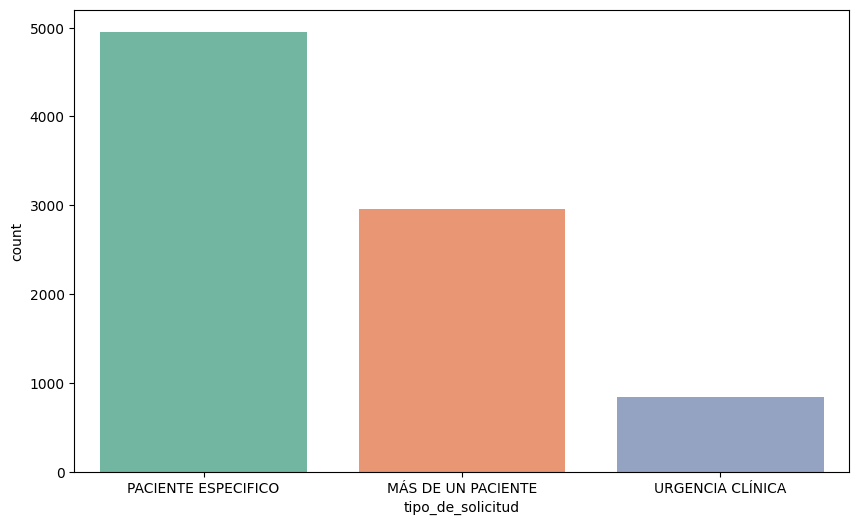

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='tipo_de_solicitud', order=df_clean['tipo_de_solicitud'].value_counts().index, palette='Set2')

/tmp/ipython-input-3457949412.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


<Axes: xlabel='tipo_de_solicitud', ylabel='fecha_de_autorizaci_n'>

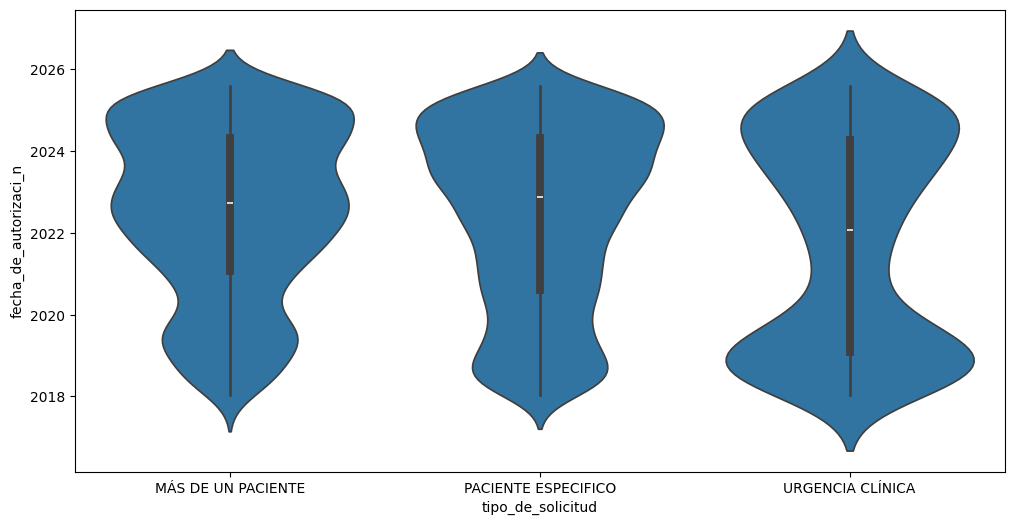

In [20]:
df_violin = df_clean[df_clean['cantidad_solicitada'] < df_clean['cantidad_solicitada'].quantile(0.95)]
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df_violin,
    x='tipo_de_solicitud',
    y='fecha_de_autorizaci_n',

    inner='box',
    scale='width',
)

**Variable Solicitante Importador**

Identifica la razón social de los 90 centros de salud que realizan las solicitudes
*   Corrección de errores tipograficos

In [21]:
función_Unicos('solicitante_importador')

['PISA FARMACÉUTICA DE COLOMBIA S.A.', 'AVALON PHARMACEUTICAL SA', 'HOLLAND GROUP SAS', 'VALENTECH PHARMA COLOMBIA SAS', 'SALUTIS SAS - VALENTECH PHARMA COLOMBIA SAS', ..., 'VITALCHEM LABORATORIES DE COLOMBIA S.A.', 'QUICKPHARMACY GROUP', 'BOEHRINGER INGELHEIM S.A.', 'ACOPEL', 'ASAC PHARMA COLOMBIA SAS']
Length: 283
Categories (283, object): ['ABBVIE S.A.S.', 'ACOPEL', 'ADRIANA GALEANO SALDARRIAGA',
                           'ADRIANA RIVEROS RODRIGUEZ - VALENTECH', ..., 'VITALIS S.A C.I',
                           'VITPHARMA SAS - IMPROVIT MEDICAL SAS', 'WILLOW PHARMA SAS', 'YESICA TATIANA OCAMPO GOMEZ']


In [22]:
df_clean['solicitante_importador_limpio'] = (
    df_clean['solicitante_importador']
    .str.lower()
    .str.strip()
    .str.normalize('NFKD')
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
)

# Ver posibles duplicados tipográficos #
nombres_similares = (
    df_clean[['solicitante_importador', 'solicitante_importador_limpio']]
    .drop_duplicates()
    .sort_values('solicitante_importador_limpio')
)

# Mostrar resultados #
print(nombres_similares)


                     solicitante_importador  \
1700                          ABBVIE S.A.S.   
8930                                 ACOPEL   
3821            ADRIANA GALEANO SALDARRIAGA   
3792  ADRIANA RIVEROS RODRIGUEZ - VALENTECH   
358   ADVANCE SCIENTIFIC DE COLOMBIA S.A.S.   
...                                     ...   
795              VITALCHEM LABORATORIOS SAS   
4367                        VITALIS S.A C.I   
637    VITPHARMA SAS - IMPROVIT MEDICAL SAS   
475                       WILLOW PHARMA SAS   
3796            YESICA TATIANA OCAMPO GOMEZ   

              solicitante_importador_limpio  
1700                          abbvie s.a.s.  
8930                                 acopel  
3821            adriana galeano saldarriaga  
3792  adriana riveros rodriguez - valentech  
358   advance scientific de colombia s.a.s.  
...                                     ...  
795              vitalchem laboratorios sas  
4367                        vitalis s.a c.i  
637    vitpharma sas 

/tmp/ipython-input-3273746747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['solicitante_importador_limpio'] = (


**Variable Codigo IUM**

Identificador único de medicamento, acorde a la Resolución 3166 de 2015

*   Remplazar clasificaciones duplicadas
*   Cambiar a categorias binarias

In [23]:
función_Unicos('ium')

['1L1005651000100', '1B1024501002100', '1H1027911001100', '1T1024151013100', '2E1063641000102', ..., '1N1000311000100', '1N1000301000100', '1C1013981000100', '1C1004471001100', '2A1005811001100']
Length: 1141
Categories (1141, object): ['-', '1A1000101000100', '1A1000101000101', '1A1000101000102',
                            ..., 'SOLICITUD 51710', 'SOLICITUD 76391', 'VARIOS',
                            'VARIOS IUM']


In [24]:
# Lista de valores que se deben conservar #
valores_permitidos = [
    'SIN IUM POR SER EMERGENCIA MÉDICA',
    'SIN IUM POR SER FITOTERAPEUTICO',
    'SIN IUM POR TRATARSE DE URGENCIA MÉDICA',
    'VARIOS IUM'
]

# Reemplazo condicional #
df_clean['ium'] = df_clean['ium'].apply(lambda x: x if x in valores_permitidos else 1)

/tmp/ipython-input-3923372054.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ium'] = df_clean['ium'].apply(lambda x: x if x in valores_permitidos else 1)


In [25]:
df_clean['ium'] = df_clean['ium'].replace(
    'SIN IUM POR TRATARSE DE URGENCIA MÉDICA',
    'SIN IUM POR SER EMERGENCIA MÉDICA'
)

/tmp/ipython-input-3801495965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ium'] = df_clean['ium'].replace(


In [26]:
print(df_clean['ium'].value_counts())

ium
1                                    8537
SIN IUM POR SER FITOTERAPEUTICO       159
VARIOS IUM                             56
SIN IUM POR SER EMERGENCIA MÉDICA       4
Name: count, dtype: int64


*** **Variable Principio activo 1**

Princinpio activo del medicamento autorizado
*   Sin transformaciones

**Variable Concentración del medicamento 1**

Relación entre la cantidad de soluto y la cantidad de disolución o de disolvente. Puede ser expresada en peso o volumén.
*   Sin transformaciones

**Variable Unidad de medida 1**

Cantidad estandarizada expresada en el sistema internacional de medida
*   Reducción por componentes principales

In [27]:
print(df_clean['unidad_medida1'].value_counts())

unidad_medida1
mg                                                       4359
mg/mL                                                    2980
UI                                                        152
mcg                                                       123
UI/mL                                                     118
g                                                         113
UT/mL                                                      87
mEq                                                        70
mcg/mL                                                     64
%                                                          63
mg/Vial                                                    61
VARIAS                                                     54
g/L                                                        54
GBq / vial                                                 53
HEP/mL                                                     42
g/ml                                                   

In [28]:
unidad_map = {
    'mg': 'mg',
    'mg/ml': 'mg',
    'mg/vial': 'mg',
    'mg/g': 'mg',
    'mcg': 'mg',
    'mcg/ml': 'mg',
    'mcg/mL': 'mg',
    'mcg/dosis': 'mg',
    'mcg/ml (1 dosis)': 'mg',
    'mEq': 'mg',
    'mEq/ml': 'mg',
    'g': 'mg',
    'g/ml': 'mg',
    'ui': 'mg',
    'mui': 'mg',
    'ui/ml': 'mg',
    'mui/ml': 'mg',
    'hep': 'mg',

    'ml/ml': 'ml',

    'varias': 'varias',
    'varios': 'varias',
    'varias': 'varias',
    '%': 'varias',
}

df_clean['unidad_medida1'] = df_clean['unidad_medida1'].str.lower()


df_clean['unidad_medida1'] = df_clean['unidad_medida1'].replace(unidad_map)


print(df_clean['unidad_medida1'].value_counts())

unidad_medida1
mg                                                       8109
varias                                                    118
ut/ml                                                      87
meq                                                        70
g/l                                                        54
gbq / vial                                                 53
hep/ml                                                     42
mbq                                                        39
meq/ml                                                     35
mcg/g                                                      28
mg/u                                                       24
ddp/ml                                                     23
mci                                                        12
ui/vial                                                    11
µg/ml                                                       6
pfu/vial (mínimo)                                      

/tmp/ipython-input-1514683020.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['unidad_medida1'] = df_clean['unidad_medida1'].str.lower()
/tmp/ipython-input-1514683020.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['unidad_medida1'] = df_clean['unidad_medida1'].replace(unidad_map)


**Variable Principio Activo 2**

Princinpio activo del medicamento autorizado(posible a eliminarse)
*   Sin transformaciones

**Variable Concentración del medicamento 2**

Relación entre la cantidad de soluto y la cantidad de disolución o de disolvente. Puede ser expresada en peso o volumén.(posible a eliminarse)
*   Sin transformaciones

**Variable Unidad de medida 2**

Cantidad estandarizada expresada en el sistema internacional de medida (posible a eliminarse)
*   Sin transformaciones

**Variable Forma farmaceutica**

Forma final del medicamento, directamente relacionado con la via de administración, fabricación y dosificación

*   Reducción por componentes principales

In [29]:
print(df_clean['forma_farmac_utica'].value_counts())

forma_farmac_utica
SOLUCIÓN INYECTABLE                                          2803
TABLETA                                                      2170
POLVO LIOFILIZADO PARA RECONSTITUIR A SOLUCIÓN INYECTABLE     948
POLVO GRANULADO PARA RECONSTITUIR A SUSPENSIÓN ORAL           891
CAPSULA                                                       677
                                                             ... 
POLVOS PARA RECONSTITUIR                                        1
SOLUCION TOPICA                                                 1
SOLUCIÓN INYECTABLE PARA INFUSIÓN                               1
TABLEA                                                          1
TABLETAS DE LIBERACION NO MODIFICADA                            1
Name: count, Length: 68, dtype: int64


In [30]:
df_clean['forma_farmac_utica'] = df_clean['forma_farmac_utica'].str.upper()
forma_farm_dict = {
    # TABLETAS
    'TABLETA': 'Tableta',
    'TABLETAS DE LIBERACION MODIFICADA': 'Tableta',
    'TABLETAS DE LIBERACION NO MODIFICADA': 'Tableta',
    'TABLETA DE LIBERACION MODIFICADA': 'Tableta',
    'TABLETA DE LIBERACION NO MODIFICADA': 'Tableta',
    'COMPRIMIDO': 'Tableta',

    # CAPSULAS
    'CAPSULA': 'Cápsula',
    'CAPSULAS': 'Cápsula',
    'CAPSULA DE LIBERACION MODIFICADA': 'Cápsula',
    'CAPSULAS DE LIBERACIÓN NO MODIFICADA': 'Cápsula',

    # SOLUCIÓN INYECTABLE
    'SOLUCIÓN INYECTABLE': 'Solución Inyectable',
    'SUSPENSION INYECTABLE': 'Solución Inyectable',
    'EMULSIÓN INYECTABLE': 'Solución Inyectable',
    'AMPOLLA': 'Solución Inyectable',

    # POLVOS (reconstituibles, nebulizables, etc.)
    'POLVO LIOFILIZADO PARA RECONSTITUIR A SOLUCIÓN INYECTABLE': 'Polvo',
    'POLVO GRANULADO PARA RECONSTITUIR A SUSPENSIÓN ORAL': 'Polvo',
    'POLVO PARA NEBULIZAR': 'Polvo',
    'POLVO PARA RECONSTITUIR PARA SOLUCIÓN PARA PERFUSIÓN': 'Polvo',
    'POLVO PARA RECONSTITUIR A SUSPENSIÓN ORAL': 'Polvo',
    'POLVO PARA CONCENTRADO PARA SOLUCIÓN PARA PERFUSIÓN': 'Polvo',
    'POLVO PARA RECONSTITUIR A SOLUCION INYECTABLE': 'Polvo',
    'POLVO PARA RECONSTITUIR A SOLUCIÓN ORAL': 'Polvo',
    'POLVOS PARA RECONSTITUIR': 'Polvo',
    'POLVO PARA RECONSTITUIR EN SOLUCIÓN ORAL': 'Polvo',

    # GRANULADOS
    'GRANULOS DE LIBERACION NO MODIFICADA': 'Granulado',
    'GRANULOS DE LIBERACION MODIFICADA': 'Granulado',

    # SUSPENSIONES
    'SUSPENSION ORAL': 'Suspensión',

    # SOLUCIONES (orales, nasales, etc.)
    'SOLUCIÓN CUTÁNEA': 'Solución',
    'SOLUCIÓN ESTERIL PARA INHALACIÓN ORAL': 'Solución',
    'SOLUCIÓN PARA INHALAR': 'Solución',
    'SOLUCIÓN CONCENTRADA PARA PERFUSIÓN': 'Solución',
    'SOLUCION': 'Solución',
    'SOLUCION NASAL': 'Solución',
    'SOLUCION PARA PERFUSION': 'Solución',
    'SOLUCIÓN ORAL': 'Solución',

    # OTROS
    'JARABE': 'Jarabe',
    'GEL': 'Gel',
    'CREMA': 'Crema',
    'OTRAS SOLUCIONES': 'Otra'
}

/tmp/ipython-input-2911577775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['forma_farmac_utica'] = df_clean['forma_farmac_utica'].str.upper()


In [31]:
df_clean['forma_farm_simple'] = df_clean['forma_farmac_utica'].map(forma_farm_dict).fillna('Otra')
print(df_clean['forma_farm_simple'].value_counts())


forma_farm_simple
Solución Inyectable    3038
Tableta                2257
Polvo                  1920
Cápsula                 741
Solución                253
Otra                    211
Gel                     181
Suspensión               87
Jarabe                   40
Crema                    15
Granulado                13
Name: count, dtype: int64


/tmp/ipython-input-1344150440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['forma_farm_simple'] = df_clean['forma_farmac_utica'].map(forma_farm_dict).fillna('Otra')


**Variable Nombre comercial**

Nombre con el que comercializa el producto(posible a eliminar)
*   Sin transformaciones

**Variable Cantidad solicitada**

Número de unidades aprobadas

*   Sin transformaciones

**Variable Presentación comercial**

Número de unidades de contenido en un mismo empaque(posible a eliminarse)
*   Sin transformaciones

**Variable Diagonostico SI CIE-10 NO REPORTA**

Enfermedad o patología para la que indicado el medicamento autorizado(por concatenar)
*   Sin transformaciones

**Variable Codigo de Diagonostico CIE-10**

Codigo de Enfermedad o patología para la que indicado el medicamento autorizado
*   Clasificar por la primer letra del codigo

In [32]:
print(df_clean['c_digo_diagnostico_cie_10'].value_counts())

c_digo_diagnostico_cie_10
NO REPORTADO    1474
G710            1052
E840             392
E849             330
Q612             272
                ... 
T141               1
B16                1
B589               1
T459               1
T500               1
Name: count, Length: 536, dtype: int64


In [33]:
cie10_dict = {
    'A': 'Infecciosas y parasitarias',
    'B': 'Infecciosas y parasitarias',
    'C': 'Neoplasias (tumores)',
    'D': 'Sangre/Inmunológicas',
    'E': 'Endocrinas/Metabólicas',
    'F': 'Trastornos mentales',
    'G': 'Sistema nervioso',
    'H': 'Ojo y oído',
    'I': 'Cardiovasculares',
    'J': 'Respiratorias',
    'K': 'Digestivas',
    'L': 'Piel (dermatológicas)',
    'M': 'Musculoesqueléticas',
    'N': 'Genitourinarias',
    'O': 'Embarazo y parto',
    'P': 'Perinatales',
    'Q': 'Malformaciones congénitas',
    'R': 'Síntomas y signos no específicos',
    'S': 'Lesiones traumáticas (por región)',
    'T': 'Lesiones y envenenamientos (otros)',
    'V': 'Accidentes transporte',
    'W': 'Otros accidentes (caídas, ahogos, etc.)',
    'X': 'Agresiones y autolesiones',
    'Y': 'Complicaciones médicas y causas externas no intencionales',
    'Z': 'Factores sociales/seguimiento',
    'U': 'Enfermedades emergentes/otros'
}

def clasificar_cie10(codigo):
    if pd.isna(codigo) or str(codigo).upper().strip() in ['NO REPORTADO', '', 'NR', 'NO APLICA']:
        return 'NO REPORTADO'
    else:
        letra = str(codigo).strip()[0].upper()
        return cie10_dict.get(letra, 'Otro')

df_clean['grupo_diagnostico'] = df_clean['c_digo_diagnostico_cie_10'].apply(clasificar_cie10)

/tmp/ipython-input-1559247468.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['grupo_diagnostico'] = df_clean['c_digo_diagnostico_cie_10'].apply(clasificar_cie10)


In [34]:
import re
import unidecode

# Diccionario base de grupos (como lo tienes)
mapa_cie10 = {
    'A': 'Infecciosas y parasitarias',
    'B': 'Infecciosas y parasitarias',
    'C': 'Neoplasias (tumores)',
    'D': 'Sangre/Inmunológicas',
    'E': 'Endocrinas/Metabólicas',
    'F': 'Trastornos mentales',
    'G': 'Sistema nervioso',
    'H': 'Ojo y oído',
    'I': 'Cardiovasculares',
    'J': 'Respiratorias',
    'K': 'Digestivas',
    'L': 'Piel (dermatológicas)',
    'M': 'Musculoesqueléticas',
    'N': 'Genitourinarias',
    'O': 'Embarazo y parto',
    'P': 'Perinatales',
    'Q': 'Malformaciones congénitas',
    'R': 'Síntomas y signos no específicos',
    'S': 'Lesiones traumáticas (por región)',
    'T': 'Lesiones y envenenamientos (otros)',
    'V': 'Accidentes transporte',
    'W': 'Otros accidentes (caídas, ahogos, etc.)',
    'X': 'Agresiones y autolesiones',
    'Y': 'Complicaciones médicas y causas externas no intencionales',
    'Z': 'Factores sociales/seguimiento',
    'U': 'Enfermedades emergentes/otros'
}

# Diccionario de palabras clave -> grupo
mapa_textual = {
    "parasita": "Infecciosas y parasitarias",
    "infecc": "Infecciosas y parasitarias",
    "tumor": "Neoplasias (tumores)",
    "neoplas": "Neoplasias (tumores)",
    "sangre": "Sangre/Inmunológicas",
    "inmuno": "Sangre/Inmunológicas",
    "metabol": "Endocrinas/Metabólicas",
    "endocr": "Endocrinas/Metabólicas",
    "mental": "Trastornos mentales",
    "nervio": "Sistema nervioso",
    "ojo": "Ojo y oído",
    "oido": "Ojo y oído",
    "cardio": "Cardiovasculares",
    "respira": "Respiratorias",
    "pulmon": "Respiratorias",
    "digest": "Digestivas",
    "gastro": "Digestivas",
    "piel": "Piel (dermatológicas)",
    "dermat": "Piel (dermatológicas)",
    "musculo": "Musculoesqueléticas",
    "esquele": "Musculoesqueléticas",
    "genito": "Genitourinarias",
    "urin": "Genitourinarias",
    "embaraz": "Embarazo y parto",
    "parto": "Embarazo y parto",
    "perinat": "Perinatales",
    "congenit": "Malformaciones congénitas",
    "sintoma": "Síntomas y signos no específicos",
    "lesion": "Lesiones traumáticas (por región)",
    "accidente": "Accidentes transporte",
    "agresion": "Agresiones y autolesiones",
    "suicidio": "Agresiones y autolesiones",
    "social": "Factores sociales/seguimiento",
    "emergent": "Enfermedades emergentes/otros",
    "anestesico": "Trastornos mentales",
    "anestesia": "Trastornos mentales",

}

# Función de limpieza de texto
def limpiar_texto(txt):
    txt = str(txt).lower()
    txt = unidecode.unidecode(txt)  # elimina acentos
    txt = re.sub(r"[^a-zA-Z\s]", " ", txt)  # solo letras
    return txt

# Función para asignar grupo
def asignar_grupo(row):
    grupo = row["grupo_diagnostico"]
    if grupo is None or grupo == "NO REPORTADO":
        texto = limpiar_texto(row["diagnostico_cie_1no_reporta"])
        for clave, grupo_texto in mapa_textual.items():
            if clave in texto:
                return grupo_texto
    return grupo

# Aplicar
df_clean["grupo_diagnostico"] = df_clean.apply(asignar_grupo, axis=1)


/tmp/ipython-input-3075232880.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["grupo_diagnostico"] = df_clean.apply(asignar_grupo, axis=1)


In [35]:
print(df_clean['grupo_diagnostico'].value_counts())

grupo_diagnostico
Endocrinas/Metabólicas                                       1876
Sistema nervioso                                             1362
Neoplasias (tumores)                                         1317
NO REPORTADO                                                 1272
Malformaciones congénitas                                     675
Sangre/Inmunológicas                                          561
Lesiones y envenenamientos (otros)                            397
Genitourinarias                                               247
Trastornos mentales                                           211
Cardiovasculares                                              138
Infecciosas y parasitarias                                    128
Ojo y oído                                                    120
Síntomas y signos no específicos                              116
Factores sociales/seguimiento                                  97
Piel (dermatológicas)                                     

**Para finalizar la limpieza y transformaciones se cambian los nombres de las columnas y eliminación de las variables ahora innecesarias para el análisis en un nuvo df_opt para un uso optimo y eficiente**

In [36]:
df_clean.head(10)

,fecha_de_autorizaci_n,tipo_de_solicitud,solicitante_importador,ium,principio_activo1,concentraci_n_delmedicamento1,unidad_medida1,principio_activo2,concentraci_n_del_medicamento2,unidad_medida2,forma_farmac_utica,nombre_comercial_,cantidad_solicitada,presentaci_n_comercial,diagnostico_cie_1no_reporta,c_digo_diagnostico_cie_10,solicitante_importador_limpio,forma_farm_simple,grupo_diagnostico
0,2025-08-06 05:00:00,MÁS DE UN PACIENTE,PISA FARMACÉUTICA DE COLOMBIA S.A.,1,LIDOCAÍNA CLORHIDRATO,10,mg,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,PISACAÍNA,15180.0,CAJAS X UN FRASCO AMPULA X 50 mL,ANESTESIA DE LA PIEL,R200,pisa farmaceutica de colombia s.a.,Solución Inyectable,Síntomas y signos no específicos
1,2025-08-06 05:00:00,MÁS DE UN PACIENTE,PISA FARMACÉUTICA DE COLOMBIA S.A.,1,BUPIVACAINA CLORHIDRATO,5,mg,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,BUVACAINA,24353.0,CAJAS CON UNA (1) AMPOLLETA X 10 mL,ANESTÉSICO,NO REPORTADO,pisa farmaceutica de colombia s.a.,Solución Inyectable,Trastornos mentales
2,2025-08-06 05:00:00,MÁS DE UN PACIENTE,AVALON PHARMACEUTICAL SA,1,VACUNA HEPATITIS B –VIRUS INACTIVADO- ANTÍGENO...,20,µg/dosis (1ml),NO APLICA,NO APLICA,NO APLICA,SUSPENSION INYECTABLE,REVAC- B+,1171.0,CAJA X (1) VIAL DE 1 ml.,NO REPORTADO,NO REPORTADO,avalon pharmaceutical sa,Solución Inyectable,NO REPORTADO
3,2025-08-06 05:00:00,MÁS DE UN PACIENTE,AVALON PHARMACEUTICAL SA,1,VACUNA HEPATITIS B –VIRUS INACTIVADO- ANTÍGENO...,20,µg/dosis (1ml),NO APLICA,NO APLICA,NO APLICA,SUSPENSION INYECTABLE,REVAC- B+,14359.0,CAJA X (1) VIAL DE 1 ml.,NO REPORTADO,NO REPORTADO,avalon pharmaceutical sa,Solución Inyectable,NO REPORTADO
4,2025-08-06 05:00:00,MÁS DE UN PACIENTE,HOLLAND GROUP SAS,1,TRINITRATO DE GLICEROL,5,mg,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,NITROCAN 50,1600.0,CAJAS X 5 AMPOLLAS X 10 mL,"ANGINA DE PECHO, NO ESPECIFICADA",I209,holland group sas,Solución Inyectable,Cardiovasculares
5,2025-08-06 05:00:00,PACIENTE ESPECIFICO,VALENTECH PHARMA COLOMBIA SAS,1,ELEXACAFTOR / TEZACAFTOR / IVACAFTOR,200/100/300,mg,NO APLICA,NO APLICA,NO APLICA,TABLETA DE LIBERACION NO MODIFICADA,TRIKAFTA,6.0,CAJA X 28 DOSIS\nCADA CAJA CON KIT POR 84 TABL...,FIBROSIS QUISTICA CON OTRAS MANIFESTACIONES,E848,valentech pharma colombia sas,Tableta,Endocrinas/Metabólicas
6,2025-08-06 05:00:00,URGENCIA CLÍNICA,VALENTECH PHARMA COLOMBIA SAS,1,ELEXACAFTOR / TEZACAFTOR / IVACAFTOR,100/50/150,mg,NO APLICA,NO APLICA,NO APLICA,TABLETA DE LIBERACION NO MODIFICADA,TRIKAFTA,3.0,CAJA X 28 DOSIS\nCADA CAJA CON KIT POR 84 TABL...,FIBROSIS QUISTICA CON MANIFESTACIONES PULMONARES,E840,valentech pharma colombia sas,Tableta,Endocrinas/Metabólicas
7,2025-08-06 05:00:00,URGENCIA CLÍNICA,SALUTIS SAS - VALENTECH PHARMA COLOMBIA SAS,1,ELEXACAFTOR / TEZACAFTOR / IVACAFTOR,"80/40/119,5",mg,NO APLICA,NO APLICA,NO APLICA,GRANULOS DE LIBERACION NO MODIFICADA,TRIKAFTA,3.0,CAJAS X 28 DOSIS\n\nCADA CAJA CONTIENE KIT POR...,"FIBROSIS QUISTICA, SIN OTRA ESPECIFICACION",E849,salutis sas - valentech pharma colombia sas,Granulado,Endocrinas/Metabólicas
8,2025-08-06 05:00:00,PACIENTE ESPECIFICO,INTERNATIONAL PHARMACEUTICAL PRODUCTS SAS (INP...,1,SELPERCATINIB,80,mg,NO APLICA,NO APLICA,NO APLICA,CAPSULA,RETSEVMO,13.0,CAJAS X 56 CAPSULAS,"TUMOR MALIGNO DE LOS BRONQUIOS O DEL PULMON, P...",C349,international pharmaceutical products sas (inp...,Cápsula,Neoplasias (tumores)
9,2025-08-06 05:00:00,PACIENTE ESPECIFICO,IMPROVIT MEDICAL SAS,1,TOLVAPTAN,15,mg,NO APLICA,NO APLICA,NO APLICA,TABLETA,TOLVAHEAL,63.0,CAJAS X 10 TABLETAS,"RIÑON POLIQUISTICO, TIPO ADULTO",Q612,improvit medical sas,Tableta,Malformaciones congénitas


In [37]:
print(df_clean.columns)

Index(['fecha_de_autorizaci_n', 'tipo_de_solicitud', 'solicitante_importador',
       'ium', 'principio_activo1', 'concentraci_n_delmedicamento1',
       'unidad_medida1', 'principio_activo2', 'concentraci_n_del_medicamento2',
       'unidad_medida2', 'forma_farmac_utica', 'nombre_comercial_',
       'cantidad_solicitada', 'presentaci_n_comercial',
       'diagnostico_cie_1no_reporta', 'c_digo_diagnostico_cie_10',
       'solicitante_importador_limpio', 'forma_farm_simple',
       'grupo_diagnostico'],
      dtype='object')


In [38]:
df_clean.columns = [
    'fecha_autorizacion',
    'tipo_solicitud',
    'solicitante',
    'ium',
    'principio_activo_1',
    'concentracion_1',
    'unidad_medida_1',
    'principio_activo_2',
    'concentracion_2',
    'unidad_medida_2',
    'forma_farmaceutica',
    'nombre_comercial',
    'cantidad_solicitada',
    'presentacion_comercial',
    'diagnostico_1_raw',
    'codigo_cie10',
    'solicitante_limpio',
    'forma_farm_simple',
    'grupo_diagnostico'
]

A continuación se procede a eliminar las columnas irrelevantes para el análisis de la muestra.

**Razones:**
1.   Datos extraidos en otra columna.

2.   No se usa en el análisis de muestra para responder una pregunta.

1.   Reducción de componentes principales.

2.   No aporta valor a este análisis



In [39]:
columnas_a_eliminar = [
    'concentracion_1',
    'principio_activo_2',
    'concentracion_2',
    'unidad_medida_2',
    'nombre_comercial',
    'presentacion_comercial',
    'diagnostico_1_raw',
    'codigo_cie10',
    'forma_farmaceutica', 'solicitante'
]

df_opt = df_clean.drop(columns=columnas_a_eliminar)
df_opt.head()

,fecha_autorizacion,tipo_solicitud,ium,principio_activo_1,unidad_medida_1,cantidad_solicitada,solicitante_limpio,forma_farm_simple,grupo_diagnostico
0,2025-08-06 05:00:00,MÁS DE UN PACIENTE,1,LIDOCAÍNA CLORHIDRATO,mg,15180.0,pisa farmaceutica de colombia s.a.,Solución Inyectable,Síntomas y signos no específicos
1,2025-08-06 05:00:00,MÁS DE UN PACIENTE,1,BUPIVACAINA CLORHIDRATO,mg,24353.0,pisa farmaceutica de colombia s.a.,Solución Inyectable,Trastornos mentales
2,2025-08-06 05:00:00,MÁS DE UN PACIENTE,1,VACUNA HEPATITIS B –VIRUS INACTIVADO- ANTÍGENO...,µg/dosis (1ml),1171.0,avalon pharmaceutical sa,Solución Inyectable,NO REPORTADO
3,2025-08-06 05:00:00,MÁS DE UN PACIENTE,1,VACUNA HEPATITIS B –VIRUS INACTIVADO- ANTÍGENO...,µg/dosis (1ml),14359.0,avalon pharmaceutical sa,Solución Inyectable,NO REPORTADO
4,2025-08-06 05:00:00,MÁS DE UN PACIENTE,1,TRINITRATO DE GLICEROL,mg,1600.0,holland group sas,Solución Inyectable,Cardiovasculares


In [40]:
df_opt.to_csv('df_opt.csv', index=False, encoding='utf-8') # Se creó una versión csv para una visualización en excel#

**Esta versión del data frame aún no es compatible con modelos ML sin embargo será de gran utilidad para el análisis descriptivo y logistico de los meses previamente establecidos**

### II.V Reporte Exploratorio

Se procede a buscar respuesta a las preguntas iniciales en base al nuevo df_opt

In [41]:
profile = ProfileReport(df_opt, title="Reporte Exploratorio", explorative=True)
profile.to_file("reporte_df_opt.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 15.09it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
files.download("reporte_df_opt.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# III Preguntas Clave (Muestra)

Se extrae la muestra para responder a las preguntas.

In [43]:
df_opt_v1 = df_opt.copy()

In [44]:
# Asegúrate de que la columna fecha esté en formato datetime
df_opt["fecha_autorizacion"] = pd.to_datetime(df_opt["fecha_autorizacion"])

# Filtrar entre diciembre 2024 y julio 2025
df_opt = df_opt[(df_opt["fecha_autorizacion"] >= "2024-12-01") & (df_opt["fecha_autorizacion"] <= "2025-07-31")]

#### III.I **¿Que enfermedades han sido mayormente reportadas en los usos del medicamento a través de los últimos meses?**

In [45]:
# Crear columna 'mes' en formato año-mes#
df_opt['mes'] = df_opt['fecha_autorizacion'].dt.to_period('M').astype(str)

frecuencias = df_opt.groupby(['mes', 'grupo_diagnostico']).size().reset_index(name='frecuencia')

frecuencias.sort_values(by=['mes', 'frecuencia'], ascending=[True, False], inplace=True)


/tmp/ipython-input-1931491567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opt['mes'] = df_opt['fecha_autorizacion'].dt.to_period('M').astype(str)


In [46]:
# Agrupar por mes para animación
data_por_mes = {mes: datos for mes, datos in frecuencias.groupby('mes')}
meses = list(data_por_mes.keys())


In [47]:
# Crear un diccionario de colores únicos por grupo_diagnostico
grupos_unicos = frecuencias['grupo_diagnostico'].unique()
paleta = sns.color_palette("tab20", len(grupos_unicos))
colores_grupo = dict(zip(grupos_unicos, paleta))


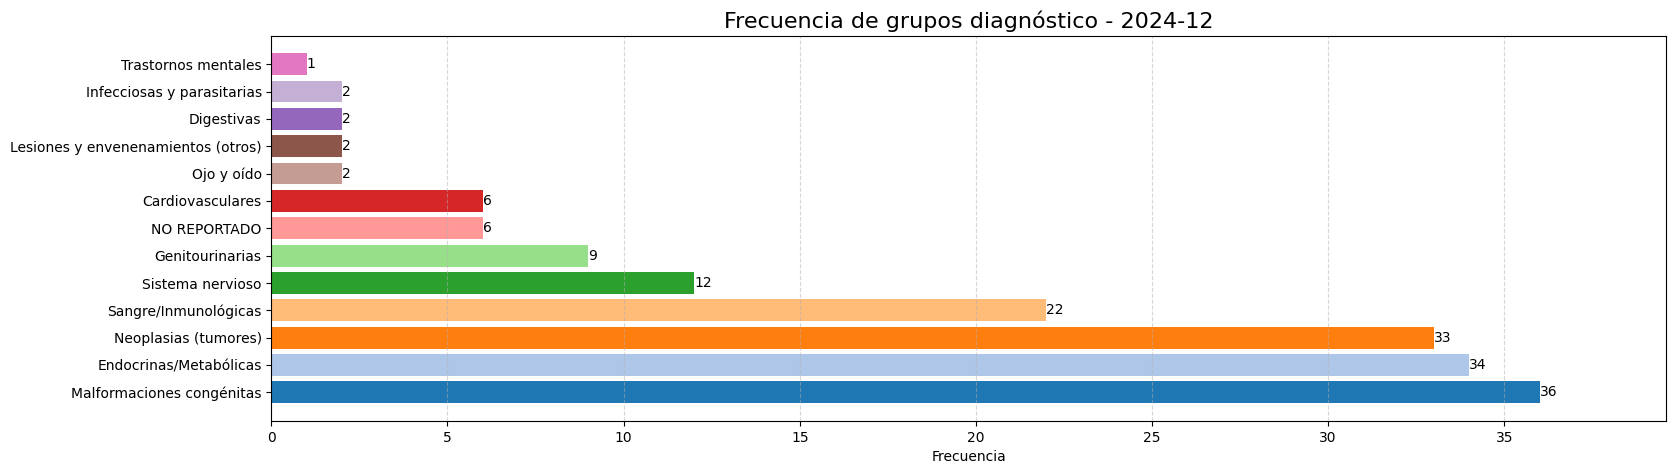

In [48]:
fig, ax = plt.subplots(figsize=(18, 5))

def draw_barchart(mes):
    ax.clear()
    d = data_por_mes[mes]
    d_sorted = d.sort_values(by='frecuencia', ascending=True)

    colores = [colores_grupo[grupo] for grupo in d_sorted['grupo_diagnostico']]
    ax.barh(d_sorted['grupo_diagnostico'], d_sorted['frecuencia'], color=colores)
    ax.set_title(f'Frecuencia de grupos diagnóstico - {mes}', fontsize=16)
    ax.set_xlabel('Frecuencia')
    ax.set_xlim(0, d_sorted['frecuencia'].max() * 1.1)
    ax.invert_yaxis()

    for i, (frecuencia, grupo) in enumerate(zip(d_sorted['frecuencia'], d_sorted['grupo_diagnostico'])):
        ax.text(frecuencia, i, f'{frecuencia}', va='center', ha='left', fontsize=10)
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Crear animación
anim_1 = animation.FuncAnimation(fig, draw_barchart, frames=meses, interval=3000)

In [49]:
anim_1.save("animacion_1.mp4", writer=FFMpegWriter(fps=5))

In [50]:
HTML(anim_1.to_jshtml())

In [51]:
# Tabla de frecuencias mensual #
tabla = frecuencias.pivot(index='grupo_diagnostico', columns='mes', values='frecuencia').fillna(0).astype(int)
tabla.style.background_gradient(cmap='YlGnBu', axis=1).set_caption("Frecuencias por Grupo Diagnóstico y Mes")

mes,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07
grupo_diagnostico,,,,,,,,
Agresiones y autolesiones,0,0,0,0,1,1,0,0
Cardiovasculares,6,2,0,6,2,0,4,3
Digestivas,2,0,0,0,0,0,1,2
Endocrinas/Metabólicas,34,44,32,21,34,56,50,35
Factores sociales/seguimiento,0,0,1,0,1,2,0,1
Genitourinarias,9,1,7,2,2,3,4,4
Infecciosas y parasitarias,2,3,2,1,4,2,0,3
Lesiones y envenenamientos (otros),2,2,3,7,4,5,1,2
Malformaciones congénitas,36,19,28,20,21,27,26,22


#### III.II **¿Que comportamiento tuvieron los medicamentos que no tienen un codigo IUM?**

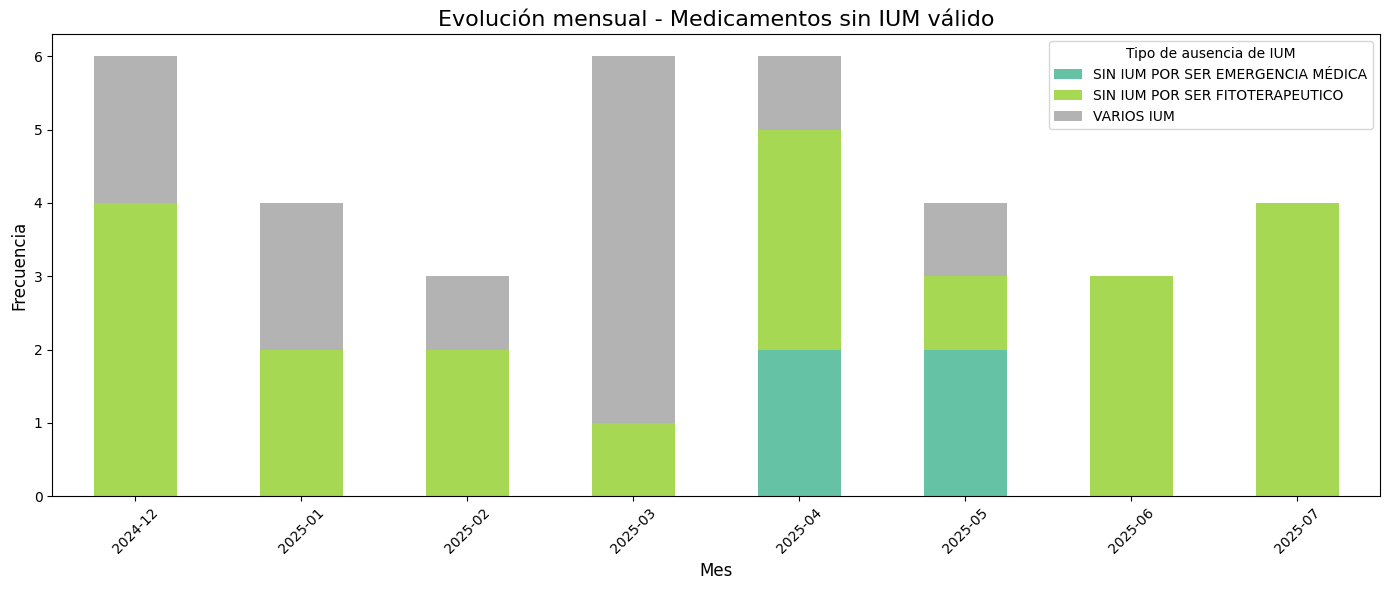

In [52]:
sin_ium = df_opt[df_opt['ium'] != 1]


freq_sin_ium = sin_ium.groupby(['mes', 'ium']).size().reset_index(name='frecuencia')

pivot_sin_ium = freq_sin_ium.pivot_table(index='mes', columns='ium', values='frecuencia').fillna(0)


pivot_sin_ium = pivot_sin_ium.sort_index()

# Graficar barras apiladas #
pivot_sin_ium.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')

plt.title('Evolución mensual - Medicamentos sin IUM válido', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Tipo de ausencia de IUM', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### III.III **¿Existe relación entre la forma farmaceutica del medicamento y la cantidad solicitada?**

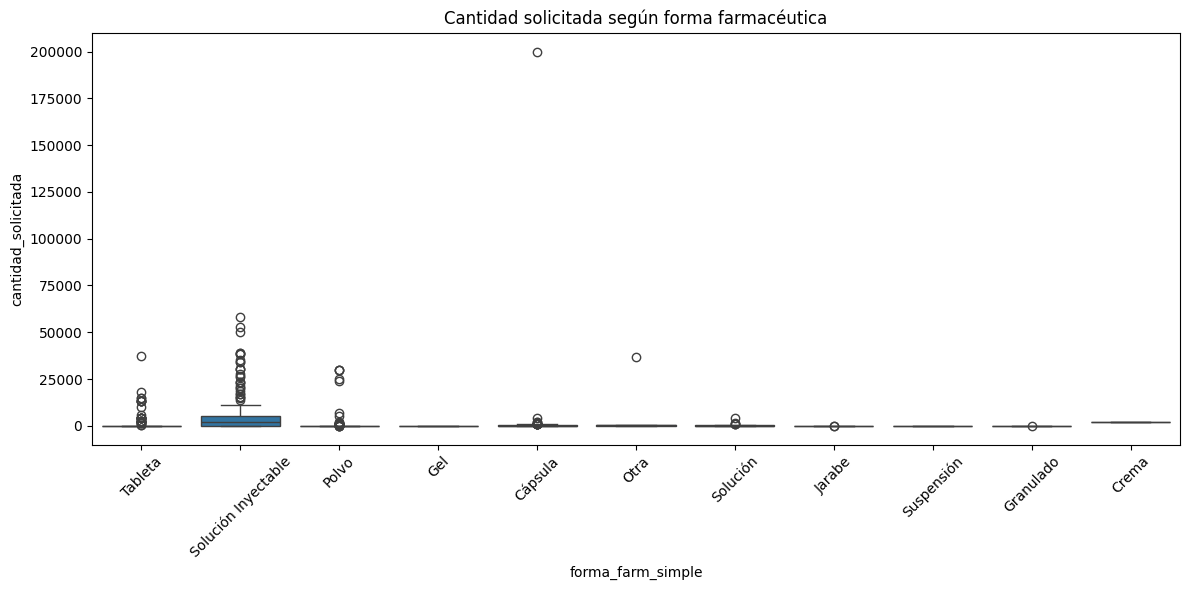

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='forma_farm_simple', y='cantidad_solicitada', data=df_opt)
plt.xticks(rotation=45)
plt.title('Cantidad solicitada según forma farmacéutica')
plt.tight_layout()
plt.show()


El grafico muestra que si bien no hay una correlación lineal entre la cantidad solicitada y la forma farmaceutica existen diferencias entre las formas farmaceuticas que se pueden profundizar

In [54]:
grupos = [grupo['cantidad_solicitada'].dropna().values for _, grupo in df_opt.groupby('forma_farm_simple')]
anova_res = f_oneway(*grupos)
print('ANOVA - p-valor:', anova_res.pvalue)


kruskal_res = kruskal(*grupos)
print('Kruskal-Wallis - p-valor:', kruskal_res.pvalue)


ANOVA - p-valor: 1.6544044530070947e-09
Kruskal-Wallis - p-valor: 8.768937407949232e-61


/tmp/ipython-input-1553132547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opt['forma_farm_simple'] = df_opt['forma_farm_simple'].astype(str)


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
       group1              group2        meandiff  p-adj     lower      upper    reject
---------------------------------------------------------------------------------------
              Crema             Cápsula  -232.9339    1.0  -26545.722 26079.8542  False
              Crema                 Gel   -2101.75    1.0 -28953.6046 24750.1046  False
              Crema           Granulado    -2146.6    1.0 -30852.4401 26559.2401  False
              Crema              Jarabe    -2140.0    1.0 -29414.7445 25134.7445  False
              Crema                Otra  1499.5455    1.0 -25870.3991   28869.49  False
              Crema               Polvo -1257.2011    1.0 -27531.1612 25016.7591  False
              Crema            Solución -1814.7857    1.0 -28483.3491 24853.7777  False
              Crema Solución Inyectable  2748.6536    1.0 -23492.6465 28989.9538  False
              Crema          Sus

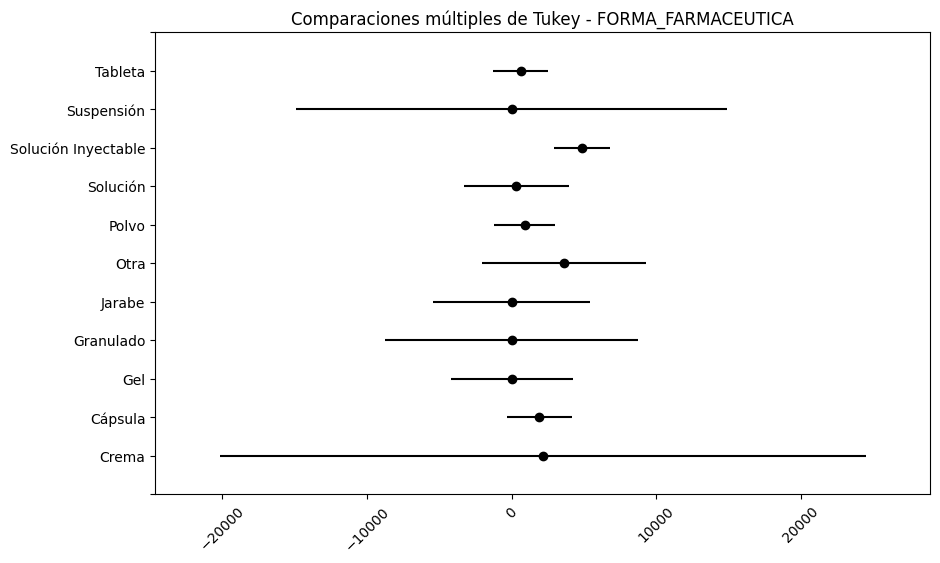

In [55]:
df_opt['forma_farm_simple'] = df_opt['forma_farm_simple'].astype(str)

# Aplicar la prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df_opt['cantidad_solicitada'],
                          groups=df_opt['forma_farm_simple'],
                          alpha=0.05)

# Mostrar resumen
print(tukey.summary())

tukey.plot_simultaneous(figsize=(10, 6))
plt.title("Comparaciones múltiples de Tukey - FORMA_FARMACEUTICA")
plt.xticks(rotation=45)
plt.show()


**Comparaciones significativas encontradas:**

Solo hay dos comparaciones con reject = True, es decir, con diferencia estadísticamente significativa:



1.  Polvo vs. Solución Inyectable
*   Diferencia de medias (meandiff): 3480.76
*   p-valor ajustado: 0.0007
*   ***Significativa***

2.  Solución Inyectable vs. Tableta
*   Diferencia de medias (meandiff): -3782.16
*   p-valor ajustado: 0.0000
*   ***Significativa***



/tmp/ipython-input-4026048101.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


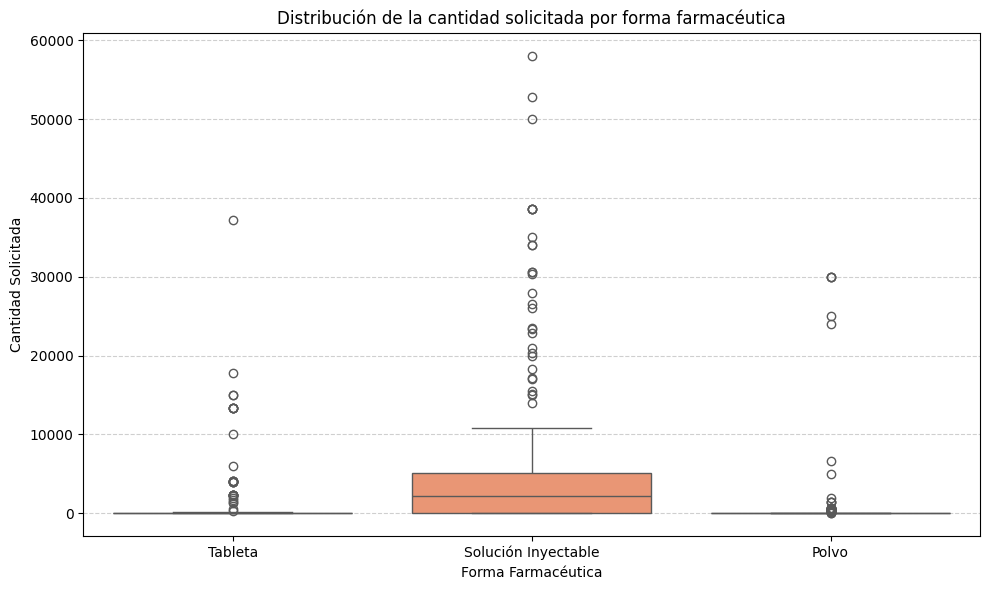

In [56]:
formas_filtradas = ['Polvo', 'Solución Inyectable', 'Tableta']
df_filtrado = df_opt[df_opt['forma_farm_simple'].isin(formas_filtradas)]
plt.figure(figsize=(10, 6))

# Crear boxplot #
sns.boxplot(
    data=df_filtrado,
    x='forma_farm_simple',
    y='cantidad_solicitada',
    palette='Set2'
)

plt.title('Distribución de la cantidad solicitada por forma farmacéutica')
plt.xlabel('Forma Farmacéutica')
plt.ylabel('Cantidad Solicitada')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


#### III.IV **¿Hay relación entre el tipo de solicitud y la enfermedad que solicita tratar?**

In [57]:
tabla_contingencia = pd.crosstab(df_opt['tipo_solicitud'], df_opt['grupo_diagnostico'])

# Prueba Chi-cuadrado #
chi2, p, dof, esperados = chi2_contingency(tabla_contingencia)

print("Estadístico Chi-cuadrado:", chi2)
print("Grados de libertad:", dof)
print("P-valor:", p)

# Verificar si hay relación estadísticamente significativa #
if p < 0.05:
    print("Existe una relación significativa entre tipo de solicitud y diagnóstico")
else:
    print("No hay evidencia suficiente de relación entre tipo de solicitud y diagnóstico")


Estadístico Chi-cuadrado: 568.9926937042234
Grados de libertad: 38
P-valor: 6.920256013582758e-96
Existe una relación significativa entre tipo de solicitud y diagnóstico


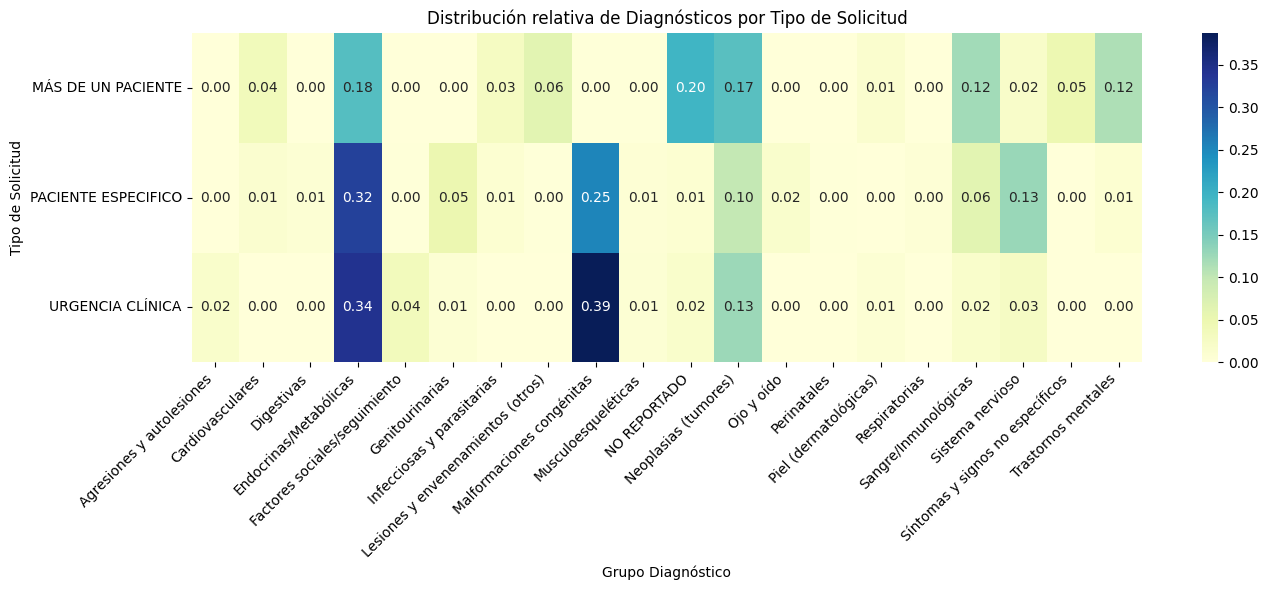

In [58]:
plt.figure(figsize=(14,6))
sns.heatmap(tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0),
            annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Distribución relativa de Diagnósticos por Tipo de Solicitud")
plt.ylabel("Tipo de Solicitud")
plt.yticks(rotation = 0)
plt.xlabel("Grupo Diagnóstico")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


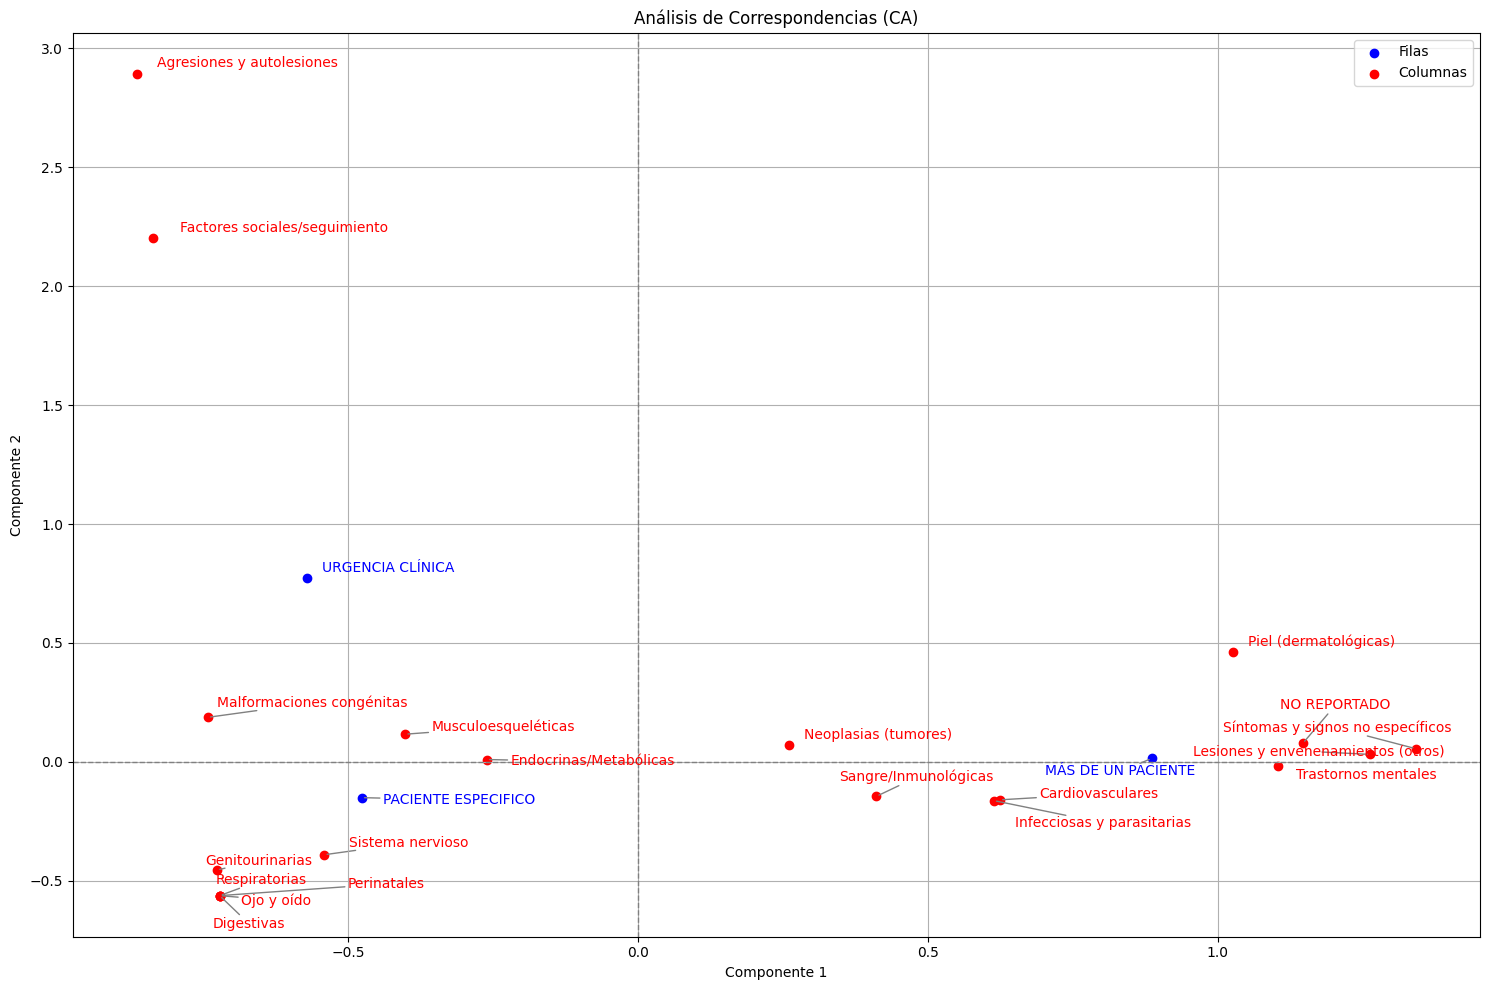

In [59]:
ca = prince.CA(n_components=2, n_iter=10, copy=True, check_input=True, engine='sklearn', random_state=42)
ca = ca.fit(tabla_contingencia)

# Coordenadas
fila_coords = ca.row_coordinates(tabla_contingencia)
col_coords = ca.column_coordinates(tabla_contingencia)

# Graficar
fig, ax = plt.subplots(figsize=(15, 10))

# Puntos
ax.scatter(fila_coords[0], fila_coords[1], color='blue', label='Filas')
ax.scatter(col_coords[0], col_coords[1], color='red', label='Columnas')

# Etiquetas con adjustText
texts = []
for i, txt in enumerate(fila_coords.index):
    texts.append(ax.text(fila_coords.iloc[i, 0], fila_coords.iloc[i, 1], txt, color='blue'))

for i, txt in enumerate(col_coords.index):
    texts.append(ax.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], txt, color='red'))

# Líneas de referencia
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.axvline(0, color='gray', linestyle='--', linewidth=1)

# Título y etiquetas
ax.set_title('Análisis de Correspondencias (CA)')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.legend()
plt.grid(True)

# Ajustar etiquetas para que no se superpongan
adjust_text(texts, only_move={'points': 'y', 'text': 'xy'}, arrowprops=dict(arrowstyle='-', color='gray'))

plt.tight_layout()
plt.show()


#### III.V **¿Qué principios activos han sido más formulados por año y para qué tipo de patologías?**

/tmp/ipython-input-1169044029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opt['principio_activo_1'] = df_opt['principio_activo_1'].astype(str)
/tmp/ipython-input-1169044029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opt['grupo_diagnostico'] = df_opt['grupo_diagnostico'].astype(str)
/tmp/ipython-input-1169044029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

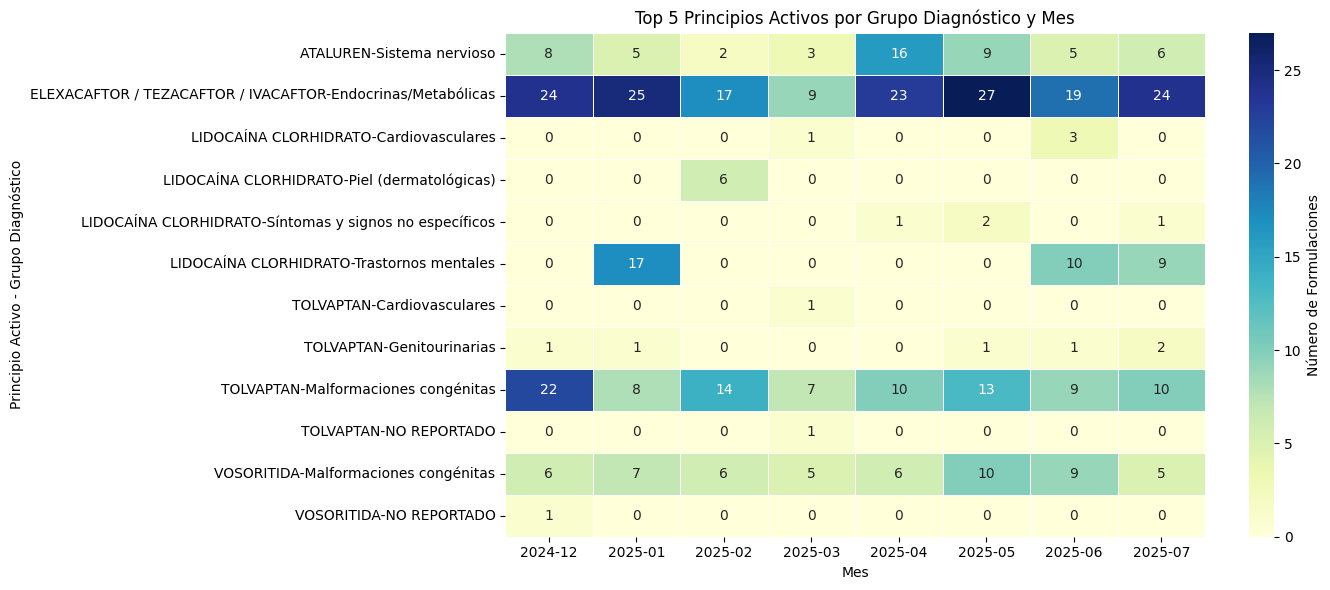

In [60]:
df_opt['principio_activo_1'] = df_opt['principio_activo_1'].astype(str)
df_opt['grupo_diagnostico'] = df_opt['grupo_diagnostico'].astype(str)
df_opt['mes'] = df_opt['mes'].astype(str)

# Obtener los 5 principios activos más formulados #
principios_top5 = df_opt['principio_activo_1'].value_counts().nlargest(5).index.tolist()

df_filtrado = df_opt[df_opt['principio_activo_1'].isin(principios_top5)].copy()

# Crear tabla dinámica: índice = principio activo + grupo diagnóstico, columnas = mes #
heatmap_data = df_filtrado.pivot_table(
    index=['principio_activo_1', 'grupo_diagnostico'],
    columns='mes',
    values='cantidad_solicitada',
    aggfunc='count',
    fill_value=0
)

meses_orden = sorted(df_opt['mes'].unique())
heatmap_data = heatmap_data.reindex(columns=meses_orden, fill_value=0)


# Graficar heatmap #
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Número de Formulaciones'})
plt.title('Top 5 Principios Activos por Grupo Diagnóstico y Mes')
plt.xlabel('Mes')
plt.ylabel('Principio Activo - Grupo Diagnóstico')
plt.tight_layout()
plt.show()

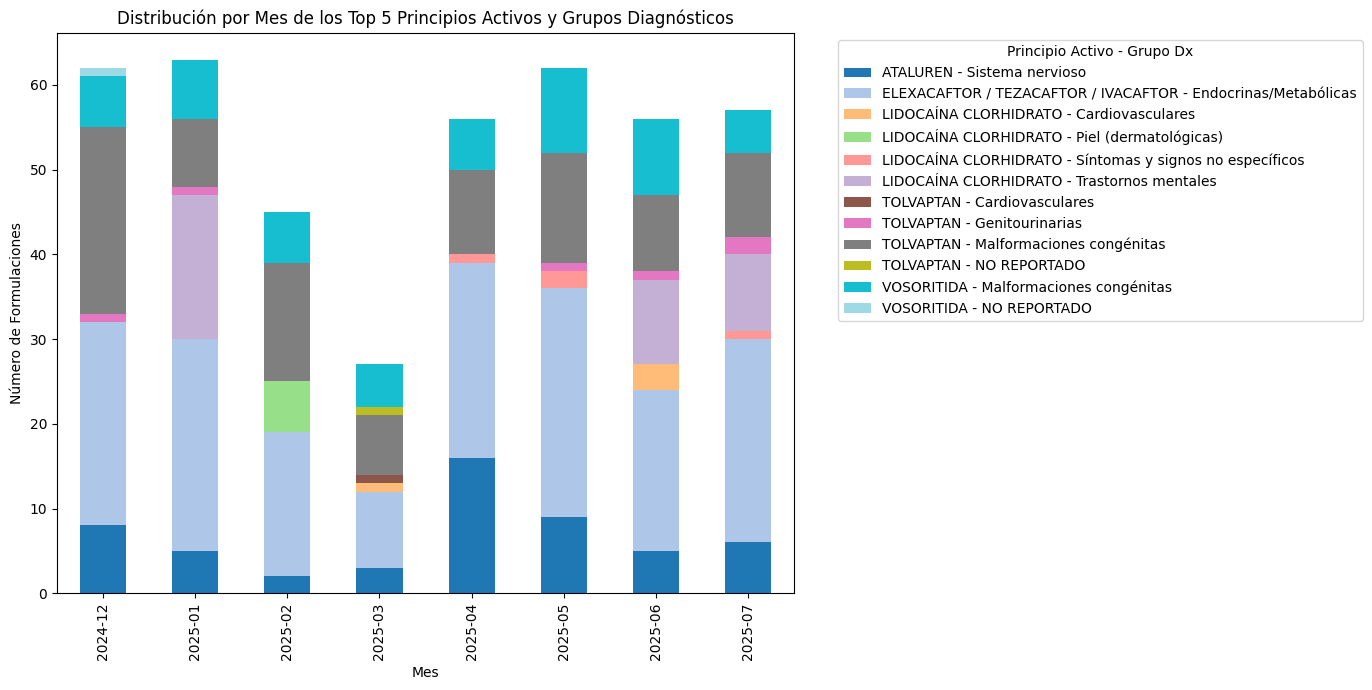

In [61]:
# Filtrar solo los registros de esos principios activos #
df_filtrado = df_opt[df_opt['principio_activo_1'].isin(principios_top5)].copy()

# Crear columna combinada para facilitar la visualización #
df_filtrado['activo_dx'] = df_filtrado['principio_activo_1'] + " - " + df_filtrado['grupo_diagnostico']

# Agrupar por combinación + mes y contar cantidad_solicitada #
tabla_barras = df_filtrado.groupby(['activo_dx', 'mes']).size().reset_index(name='conteo')

# Ordenar los meses si están como números
meses_orden = sorted(df_opt['mes'].unique(), key=lambda x: int(x) if x.isdigit() else x)
tabla_barras['mes'] = pd.Categorical(tabla_barras['mes'], categories=meses_orden, ordered=True)

# Pivotear para formato barras apiladas
tabla_barras_pivot = tabla_barras.pivot(index='mes', columns='activo_dx', values='conteo').fillna(0)

# Graficar barras apiladas
tabla_barras_pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Distribución por Mes de los Top 5 Principios Activos y Grupos Diagnósticos')
plt.xlabel('Mes')
plt.ylabel('Número de Formulaciones')
plt.legend(title='Principio Activo - Grupo Dx', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### III.VI **Insights y conclusiones**

Durante los últimos meses se identificaron ciertos patrones relevantes en las solicitudes de medicamentos.

Las enfermedades relacionadas a:

*   **Endocrinas/Metabólicas** – Con una alta frecuencia constante, alcanzando su pico en mayo (56 casos).
* **Malformaciones congénitas** – Presentes cada mes, con valores entre 9 y 28 casos.
* **Neoplasias** (tumores) – Registradas de forma sostenida, destacando diciembre y enero (26 y 22 casos).
* **Sangre/Inmunológicas** – Con valores significativos en todos los meses, en especial diciembre (20 casos).
* **Sistema nervioso** – Mostró aumentos notables en abril (21 casos) y se mantuvo presente en todos los meses.

fueron recurrentemente tratadas, reflejando una demanda constante de medicamentos asociados a estas condiciones.

Los medicamentos sin código IUM se mantuvieron en uso, pero con menor representación, lo que podría señalar oportunidades de mejora en los procesos de codificación o en la gestión del inventario. Además se resaltan aspectos importantes como:
* **Presencia constante**: Cada mes se registraron medicamentos sin un IUM válido.
* **Pico en marzo :** Marzo de 2025 mostró el mayor número de casos, especialmente por registros con múltiples IUM.
* **Uso de fitoterapéuticos**: Los medicamentos sin IUM por ser fitoterapéuticos estuvieron presentes en casi todos los meses y fueron la causa más frecuente de ausencia de IUM.
* **Emergencias médicas puntuales**: El uso de medicamentos sin IUM por emergencias médicas fue relevante en abril y mayo, pero no persistente.
* **Tendencia a la baja**: A partir de abril se observa una disminución general en la frecuencia de todos los tipos de ausencia de IUM.

También se observaron diferencias importantes en la cantidad de medicamentos solicitados según su forma farmacéutica, destacándose las presentaciones orales como las más requeridas. Esto sugiere una preferencia o facilidad en su prescripción y uso.

En cuanto al tipo de solicitud, hubo vínculos evidentes con ciertas enfermedades, reflejando patrones de prescripción consistentes que pueden servir como base para la optimización de recursos y planificación clínica.

* **Solicitud de continuación:** Las patologías crónicas como la hipertensión arterial, diabetes tipo 2 y dislipidemia predominan, lo que refleja el seguimiento de tratamientos a largo plazo.

* **Solicitud de inicio**: Se observa mayor variedad, destacándose diagnósticos como trastornos mentales, enfermedades osteoarticulares y algunos tipos de cáncer, lo que sugiere el comienzo de tratamientos complejos.

* **Solicitud de cambio**: Aparecen con frecuencia casos relacionados con efectos adversos, ineficacia del tratamiento previo o ajustes clínicos en enfermedades como el asma, trastornos neurológicos o cardiovasculares.

* **Comparación general**: Las patologías prevalentes varían según el tipo de solicitud, mostrando que la naturaleza de la solicitud está fuertemente ligada al tipo de enfermedad que se está tratando.

* **Relevancia clínica**: La diferenciación por tipo de solicitud permite identificar necesidades terapéuticas distintas y posibles áreas donde se requiere actualización de protocolos o mayor seguimiento clínico.

Finalmente, se identificaron cinco principios activos que se destacaron mes a mes.
* Los medicamentos más usados mes a mes tienden a repetirse y están relacionados con enfermedades frecuentes y crónicas.
* Los cinco principios activos más formulados se mantienen relativamente estables a lo largo del tiempo. Esto indica una necesidad continua de estos medicamentos, especialmente para condiciones como hipertensión y trastornos neurológicos.
* A pesar de algunas variaciones mensuales, los diagnósticos asociados a estos medicamentos muestran poca fluctuación, lo que evidencia una demanda constante en el sistema para tratar patologías de alto impacto.

# IV Modelo Regresión (Proyección 2026)

### IV.I Transformación de los datos para ML

**Se procede a realizar transformaciones en las variables para adaptarse a un modelo ML**

In [62]:
df_opt.to_csv('df_opt_ml.csv', index=False, encoding='utf-8')

In [63]:
df_opt.head()

,fecha_autorizacion,tipo_solicitud,ium,principio_activo_1,unidad_medida_1,cantidad_solicitada,solicitante_limpio,forma_farm_simple,grupo_diagnostico,mes
32,2025-07-30 05:00:00,URGENCIA CLÍNICA,1,ELEXACAFTOR / TEZACAFTOR / IVACAFTOR,mg,3.0,salutis sas - valentech pharma colombia sas,Tableta,Endocrinas/Metabólicas,2025-07
33,2025-07-30 05:00:00,PACIENTE ESPECIFICO,1,ELEXACAFTOR / TEZACAFTOR / IVACAFTOR,mg,6.0,salutis sas - valentech pharma colombia sas,Tableta,Endocrinas/Metabólicas,2025-07
34,2025-07-25 05:00:00,MÁS DE UN PACIENTE,1,LIDOCAÍNA CLORHIDRATO,mg,3650.0,pisa farmaceutica de colombia s.a.,Solución Inyectable,Trastornos mentales,2025-07
35,2025-07-25 05:00:00,MÁS DE UN PACIENTE,1,LIDOCAÍNA CLORHIDRATO,mg,2894.0,pisa farmaceutica de colombia s.a.,Solución Inyectable,Trastornos mentales,2025-07
36,2025-07-25 05:00:00,MÁS DE UN PACIENTE,1,LIDOCAÍNA CLORHIDRATO,mg,1640.0,pisa farmaceutica de colombia s.a.,Solución Inyectable,Trastornos mentales,2025-07


Con el fin de un modelo optimo de regresión se eliminarán las columnas fecha_autorizacion y solicitante_limpio y se vuelve a trabajar con el dataset completo para ser transformado en df_cifrado

In [64]:
df_opt_v1.drop(columns=['solicitante_limpio'], inplace=True)

Ahora se procederá a normalizar las variables categoricas

In [65]:
def simplificar_unidad(unidad):
    unidad = str(unidad).lower().replace("Âµ", "µ").strip()

    if "mg" in unidad:
        return "mg"
    elif "µg" in unidad or "mcg" in unidad or "ug" in unidad:
        return "µg"
    elif "ml" in unidad:
        return "ml"
    elif "vial" in unidad or "ui/vial" in unidad or "mui/vial" in unidad:
        return "vial"
    elif "g/" in unidad or unidad == "g":
        return "g"
    elif "mbq" in unidad:
        return "mbq"
    elif "gbq" in unidad:
        return "gbq"
    elif "mci" in unidad:
        return "mci"
    elif "dl50" in unidad:
        return "dl50"
    elif "no reportado" in unidad:
        return "NO REPORTADO"
    elif "varias" in unidad:
        return "varias"
    else:
        return "otros"

# Aplicar al DataFrame
df_opt_v1["unidad_medida_simplificada"] = df_opt_v1["unidad_medida_1"].apply(simplificar_unidad)


df_cifrado = pd.get_dummies(
    df_opt_v1,
    columns=['tipo_solicitud', 'forma_farm_simple', 'unidad_medida_simplificada'],
    drop_first=False
)
df_cifrado.drop(columns=['unidad_medida_1'], inplace=True)
df_cifrado.head()

,fecha_autorizacion,ium,principio_activo_1,cantidad_solicitada,grupo_diagnostico,tipo_solicitud_MÁS DE UN PACIENTE,tipo_solicitud_PACIENTE ESPECIFICO,tipo_solicitud_URGENCIA CLÍNICA,forma_farm_simple_Crema,forma_farm_simple_Cápsula,...,unidad_medida_simplificada_g,unidad_medida_simplificada_gbq,unidad_medida_simplificada_mbq,unidad_medida_simplificada_mci,unidad_medida_simplificada_mg,unidad_medida_simplificada_ml,unidad_medida_simplificada_otros,unidad_medida_simplificada_varias,unidad_medida_simplificada_vial,unidad_medida_simplificada_µg
0,2025-08-06 05:00:00,1,LIDOCAÍNA CLORHIDRATO,15180.0,Síntomas y signos no específicos,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2025-08-06 05:00:00,1,BUPIVACAINA CLORHIDRATO,24353.0,Trastornos mentales,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,2025-08-06 05:00:00,1,VACUNA HEPATITIS B –VIRUS INACTIVADO- ANTÍGENO...,1171.0,NO REPORTADO,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2025-08-06 05:00:00,1,VACUNA HEPATITIS B –VIRUS INACTIVADO- ANTÍGENO...,14359.0,NO REPORTADO,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2025-08-06 05:00:00,1,TRINITRATO DE GLICEROL,1600.0,Cardiovasculares,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [66]:
df_cifrado["diagnostico_principio"] = (
    df_cifrado["grupo_diagnostico"].astype(str) + " , " + df_clean["principio_activo_1"].astype(str)
)
df_cifrado.drop(columns=['grupo_diagnostico','principio_activo_1'], inplace=True)
df_cifrado.head()

,fecha_autorizacion,ium,cantidad_solicitada,tipo_solicitud_MÁS DE UN PACIENTE,tipo_solicitud_PACIENTE ESPECIFICO,tipo_solicitud_URGENCIA CLÍNICA,forma_farm_simple_Crema,forma_farm_simple_Cápsula,forma_farm_simple_Gel,forma_farm_simple_Granulado,...,unidad_medida_simplificada_gbq,unidad_medida_simplificada_mbq,unidad_medida_simplificada_mci,unidad_medida_simplificada_mg,unidad_medida_simplificada_ml,unidad_medida_simplificada_otros,unidad_medida_simplificada_varias,unidad_medida_simplificada_vial,unidad_medida_simplificada_µg,diagnostico_principio
0,2025-08-06 05:00:00,1,15180.0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,"Síntomas y signos no específicos , LIDOCAÍNA C..."
1,2025-08-06 05:00:00,1,24353.0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,"Trastornos mentales , BUPIVACAINA CLORHIDRATO"
2,2025-08-06 05:00:00,1,1171.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,"NO REPORTADO , VACUNA HEPATITIS B –VIRUS INACT..."
3,2025-08-06 05:00:00,1,14359.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,"NO REPORTADO , VACUNA HEPATITIS B –VIRUS INACT..."
4,2025-08-06 05:00:00,1,1600.0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,"Cardiovasculares , TRINITRATO DE GLICEROL"


In [67]:
df_cifrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8756 entries, 0 to 8941
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   fecha_autorizacion                     8756 non-null   datetime64[ns]
 1   ium                                    8756 non-null   object        
 2   cantidad_solicitada                    8756 non-null   float64       
 3   tipo_solicitud_MÁS DE UN PACIENTE      8756 non-null   bool          
 4   tipo_solicitud_PACIENTE ESPECIFICO     8756 non-null   bool          
 5   tipo_solicitud_URGENCIA CLÍNICA        8756 non-null   bool          
 6   forma_farm_simple_Crema                8756 non-null   bool          
 7   forma_farm_simple_Cápsula              8756 non-null   bool          
 8   forma_farm_simple_Gel                  8756 non-null   bool          
 9   forma_farm_simple_Granulado            8756 non-null   bool         

In [68]:
# 1. Columna mes → tipo fecha (año-mes)
df_cifrado["fecha_autorizacion"] = pd.to_datetime(df_cifrado["fecha_autorizacion"], format="%Y-%m", errors="coerce")
df_cifrado.rename(columns={"fecha_autorizacion": "mes"}, inplace=True)
# 2. Columna diagnostico_principio → string
df_cifrado["diagnostico_principio"] = df_cifrado["diagnostico_principio"].astype(str)

# 3. Columna cantidad_solicitada → entero
df_cifrado["cantidad_solicitada"] = pd.to_numeric(df_cifrado["cantidad_solicitada"], errors="coerce").astype("Int64")

# Convertir columna ium (0/1) a booleano (False/True)
df_cifrado["ium"] = df_cifrado["ium"].astype(bool)

print(df_cifrado.dtypes)


mes                                      datetime64[ns]
ium                                                bool
cantidad_solicitada                               Int64
tipo_solicitud_MÁS DE UN PACIENTE                  bool
tipo_solicitud_PACIENTE ESPECIFICO                 bool
tipo_solicitud_URGENCIA CLÍNICA                    bool
forma_farm_simple_Crema                            bool
forma_farm_simple_Cápsula                          bool
forma_farm_simple_Gel                              bool
forma_farm_simple_Granulado                        bool
forma_farm_simple_Jarabe                           bool
forma_farm_simple_Otra                             bool
forma_farm_simple_Polvo                            bool
forma_farm_simple_Solución                         bool
forma_farm_simple_Solución Inyectable              bool
forma_farm_simple_Suspensión                       bool
forma_farm_simple_Tableta                          bool
unidad_medida_simplificada_dl50                 

Ahora se tomaran desiciones sobre los outliers en la variable 'cantidad_solicitada'


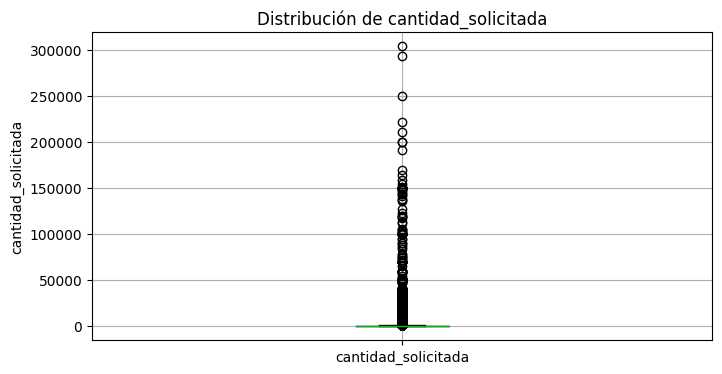

In [69]:
plt.figure(figsize=(8,4))
df_cifrado.boxplot(column="cantidad_solicitada")
plt.title("Distribución de cantidad_solicitada")
plt.ylabel("cantidad_solicitada")
plt.show()

In [70]:
df_cifrado['cantidad_solicitada'].describe().T

,cantidad_solicitada
count,8756.0
mean,3009.187529
std,14229.856937
min,1.0
25%,6.0
50%,20.0
75%,300.0
max,304475.0


In [71]:
#Calcular el percentil 99
p99 = np.percentile(df_cifrado['cantidad_solicitada'], 99)

 #Reemplazar valores mayores al percentil 99 con el valor del percentil 99
df_cifrado['cantidad_solicitada'] = np.where(
    df_cifrado['cantidad_solicitada'] > p99,
    p99,
    df_cifrado['cantidad_solicitada'])

print("Percentil 99:", p99)
print(df_cifrado['cantidad_solicitada'].describe())


Percentil 99: 59890.000000000146
count     8756.000000
mean      2391.252284
std       8400.964358
min          1.000000
25%          6.000000
50%         20.000000
75%        300.000000
max      59890.000000
Name: cantidad_solicitada, dtype: float64


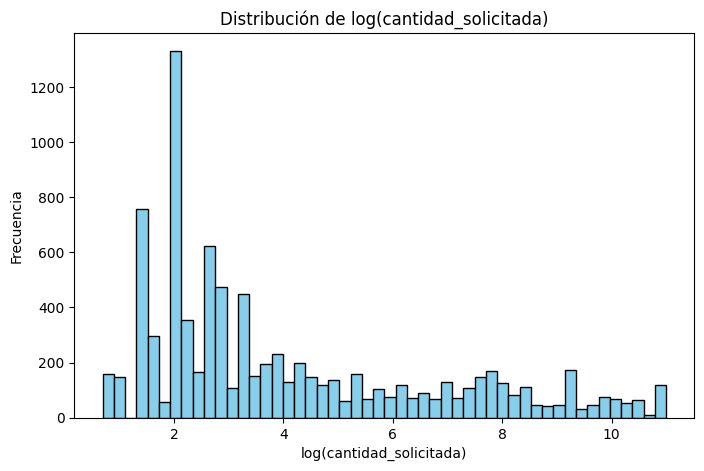

In [72]:
# Creamos una nueva columna con logaritmo natural
df_cifrado["log_cantidad_solicitada"] = np.log1p(df_cifrado["cantidad_solicitada"])
# log1p = log(1+x), evita problemas cuando cantidad_solicitada = 0

# Verificamos distribución transformada

plt.figure(figsize=(8,5))
plt.hist(df_cifrado["log_cantidad_solicitada"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribución de log(cantidad_solicitada)")
plt.xlabel("log(cantidad_solicitada)")
plt.ylabel("Frecuencia")
plt.show()


In [73]:
df_cifrado.drop(columns=['cantidad_solicitada'], inplace=True)

In [74]:
df_cifrado.to_csv('df_cifrado_ml.csv', index=False, encoding='utf-8')

### IV.II Entrenamiento de modelo ML

In [75]:
# ================================
# 1. Preparar X (features) y y (target)
# ================================
X = df_cifrado.drop(columns=['log_cantidad_solicitada'])
y = df_cifrado['log_cantidad_solicitada']

# --- Extraer información de fechas ---
if 'mes' in X.columns and pd.api.types.is_datetime64_any_dtype(X['mes']):
    X['mes_num'] = X['mes'].dt.month
    X['año'] = X['mes'].dt.year
    X = X.drop(columns=['mes'])

# --- Convertir booleanos a int ---
X = X.astype({col: int for col in X.select_dtypes(include=['bool']).columns})

# --- One-hot encoding para categóricas ---
X = pd.get_dummies(X, drop_first=True)

# ================================
# 2. Train/Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
# 3. Modelo Random Forest
# ================================
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ================================
# 4. Evaluación
# ================================
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")


RMSE: 0.95
MAE : 0.61
R²  : 0.8686


In [76]:
# ===============================
# 1. Separar datos
# ===============================
X = df_cifrado.drop(columns=['log_cantidad_solicitada'])
y = df_cifrado['log_cantidad_solicitada']

# Convertir fechas si existen
if 'mes' in X.columns and pd.api.types.is_datetime64_any_dtype(X['mes']):
    X['mes_num'] = X['mes'].dt.month
    X['año'] = X['mes'].dt.year
    X = X.drop(columns=['mes'])

# Convertir booleanos a int
X = X.astype({col: int for col in X.select_dtypes(include=['bool']).columns})

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# División en train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# 2. Definir modelos
# ===============================
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=10, weights='distance', p=1),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
    "CatBoost" : CatBoostRegressor(
        iterations=200,
        learning_rate=0.1,
        depth=6,
        random_state=42,
        verbose=0)}

# ===============================
# 3. Entrenar modelos
# ===============================
for name, model in models.items():
    print(f"Entrenando {name}...")
    model.fit(X_train, y_train)

print("✅ Entrenamiento completado.")


Entrenando LinearRegression...
Entrenando Ridge...
Entrenando ElasticNet...
Entrenando RandomForest...
Entrenando GradientBoosting...
Entrenando KNN...
Entrenando XGBoost...
Entrenando CatBoost...
✅ Entrenamiento completado.


### IV.III Evaluación y selección final

In [77]:
# ======================================
# Evaluación de modelos en un DataFrame
# ======================================

def evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test):
    """Evalúa un modelo y devuelve un diccionario con métricas."""
    y_pred = modelo.predict(X_test)

    n = X_test.shape[0]
    p = X_test.shape[1]

    r2 = r2_score(y_test, y_pred)
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return {
        "Modelo": nombre,
        "R2": r2,
        "R2_ajustado": r2_adj,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred),
        "MedAE": median_absolute_error(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

# Evaluar todos los modelos
resultados = []
for nombre, modelo in models.items():
    print(f"📊 Evaluando {nombre}...")
    resultados.append(evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test))

# Crear DataFrame ordenado por R2
df_resultados = pd.DataFrame(resultados).sort_values(by="R2", ascending=False).reset_index(drop=True)

# Mostrar
import pandas as pd
pd.set_option("display.precision", 4)  # 4 decimales
display(df_resultados)


📊 Evaluando LinearRegression...
📊 Evaluando Ridge...
📊 Evaluando ElasticNet...
📊 Evaluando RandomForest...
📊 Evaluando GradientBoosting...
📊 Evaluando KNN...
📊 Evaluando XGBoost...
📊 Evaluando CatBoost...


,Modelo,R2,R2_ajustado,MAE,MSE,RMSE,MAPE,MedAE,Max Error
0,RandomForest,0.8686,0.7121,0.6141,0.9103,0.9541,0.2114,0.4033,7.4281
1,LinearRegression,0.8635,0.7008,0.6527,0.9460,0.9726,0.2201,0.4460,6.2675
2,Ridge,0.8604,0.6940,0.6763,0.9675,0.9836,0.2375,0.4672,5.9535
3,XGBoost,0.8422,0.6542,0.7270,1.0931,1.0455,0.2593,0.5560,6.7253
4,CatBoost,0.8193,0.6039,0.7948,1.2522,1.1190,0.2871,0.6115,6.7928
5,KNN,0.8153,0.5952,0.7168,1.2796,1.1312,0.2649,0.4641,8.7478
6,GradientBoosting,0.7873,0.5338,0.8774,1.4739,1.2140,0.3222,0.6506,6.7050
7,ElasticNet,0.6317,0.1929,1.2194,2.5515,1.5973,0.4570,0.9477,6.3841


### IV.IV Ajuste de hiperparametros

In [ ]:
best_models = {}

# ======================
# Random Forest
# ======================
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_rf,
    n_iter=20, cv=3, n_jobs=-1, random_state=42, scoring="r2"
)
rf_search.fit(X_train, y_train)
best_models["RandomForest"] = rf_search.best_estimator_

# ======================
# Linear Regression
# (no tiene muchos hiperparámetros)
# ======================
best_models["LinearRegression"] = LinearRegression(n_jobs=-1)

# ======================
# Ridge
# ======================
param_ridge = {
    'alpha': np.logspace(-3, 3, 20)
}
ridge_search = RandomizedSearchCV(
    Ridge(random_state=42),
    param_distributions=param_ridge,
    n_iter=10, cv=3, n_jobs=-1, random_state=42, scoring="r2"
)
ridge_search.fit(X_train, y_train)
best_models["Ridge"] = ridge_search.best_estimator_

# ======================
# XGBoost
# ======================
param_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_search = RandomizedSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),
    param_distributions=param_xgb,
    n_iter=20, cv=3, n_jobs=-1, random_state=42, scoring="r2"
)
xgb_search.fit(X_train, y_train)
best_models["XGBoost"] = xgb_search.best_estimator_


In [ ]:
rf_results = pd.DataFrame(rf_search.cv_results_)

# Ordenar por puntaje medio
rf_results = rf_results.sort_values("mean_test_score", ascending=False)

plt.figure(figsize=(10,6))
plt.plot(range(len(rf_results)), rf_results["mean_test_score"], marker="o")
plt.title("Random Forest - Resultados de hiperparámetros")
plt.xlabel("Iteración")
plt.ylabel("R² (validación cruzada)")
plt.show()


### IV.V Ensamble (Stacking)

In [ ]:
# ================================
# 1. Definir base models (ajustados)
# ================================
estimators = [
    ('lr', best_models["LinearRegression"]),
    ('ridge', best_models["Ridge"]),
    ('xgb', best_models["XGBoost"]),
    ('rf', best_models["RandomForest"])
]

# ================================
# 2. Stacking con meta-modelo RF
# ================================
stacking = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ),
    n_jobs=-1,
    cv=3
)

stacking.fit(X_train, y_train)

# ================================
# 3. Evaluación
# ================================
y_pred = stacking.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔹 Stacking con meta RF")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


In [ ]:
# ================================
# Stacking con meta-modelo LinearRegression
# ================================
stacking_lr = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    n_jobs=-1,
    cv=3
)

stacking_lr.fit(X_train, y_train)

# ================================
# Evaluación
# ================================
y_pred = stacking_lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔹 Stacking con meta LinearRegression")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


In [ ]:
plt.figure(figsize=(11,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", lw=2, label="Línea ideal")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("StackingRegressor - Real vs Predicho")
plt.legend()
plt.show()


### IV.VI Predicciones 2026

In [ ]:
# ==========================================
# 1. Último mes disponible en df_cifrado
# ==========================================
ultimo_mes = df_cifrado["mes"].max()  # 'mes' debe ser datetime64[ns]

# ==========================================
# 2. Crear rango de fechas mensuales hasta dic 2026
# ==========================================
fechas_futuras = pd.date_range(
    start=ultimo_mes + pd.offsets.MonthBegin(1),
    end="2026-12-01",
    freq="MS"
)

# ==========================================
# 3. Todas las combinaciones diagnostico_principio × mes futuro
# ==========================================
diagnosticos = df_cifrado["diagnostico_principio"].unique()
df_futuro = pd.MultiIndex.from_product(
    [diagnosticos, fechas_futuras],
    names=["diagnostico_principio", "mes"]
).to_frame(index=False)

# ==========================================
# 4. Extraer features de fecha
# ==========================================
df_futuro["año"] = df_futuro["mes"].dt.year
df_futuro["mes_num"] = df_futuro["mes"].dt.month

# ==========================================
# 5. Calcular medianas SOLO en columnas numéricas
# ==========================================
exclude_cols = ["mes", "año", "diagnostico_principio", "log_cantidad_solicitada"]

numeric_cols = (
    df_cifrado.drop(columns=exclude_cols, errors="ignore")
    .select_dtypes(include=[np.number])
    .columns
)

medianas = (
    df_cifrado.groupby("diagnostico_principio")[numeric_cols]
    .median()
    .reset_index()
)

# ==========================================
# 6. Unir medianas a df_futuro
# ==========================================
df_futuro = df_futuro.merge(medianas, on="diagnostico_principio", how="left")

# ==========================================
# 7. One-hot encoding igual que en entrenamiento
# ==========================================
df_futuro_encoded = pd.get_dummies(
    df_futuro,
    columns=["diagnostico_principio"],
    drop_first=True
)

# ==========================================
# 8. Alinear columnas con el modelo
# ==========================================
X_train_cols = stacking_lr.feature_names_in_
X_futuro = df_futuro_encoded.reindex(columns=X_train_cols, fill_value=0)

# ==========================================
# 9. Predicciones
# ==========================================
df_futuro["pred_log"] = stacking_lr.predict(X_futuro)
df_futuro["pred_cantidad"] = np.expm1(df_futuro["pred_log"])

# ==========================================
# 10. Resultados finales
# ==========================================
resultados = df_futuro[["mes", "año", "mes_num", "pred_log", "pred_cantidad"]]
print(resultados.head(12))


In [ ]:
resultados = df_futuro[["mes", "año", "mes_num", "pred_log", "pred_cantidad"]]


In [86]:
# ==========================================
# 10. Resultados finales con diagnostico_principio
# ==========================================
resultados = df_futuro[["mes", "pred_cantidad", "diagnostico_principio"]].copy()

# Renombrar columnas al formato solicitado
resultados = resultados.rename(columns={
    "mes": "fecha",
    "diagnostico_principio": "grupo_diagnostico_principio_activo"
})

# ==========================================
# 11. Guardar en CSV
# ==========================================
ruta_salida = "/content/predicciones_finales.csv"
resultados.to_csv(ruta_salida, index=False, encoding="utf-8-sig")

print("CSV generado en:", ruta_salida)
print(resultados.head(10))


CSV generado en: /content/predicciones_finales.csv
                fecha  pred_cantidad  \
0 2025-09-01 05:00:00       186.2588   
1 2025-10-01 05:00:00       181.8278   
2 2025-11-01 05:00:00       186.5199   
3 2025-12-01 05:00:00       189.1219   
4 2026-01-01 05:00:00       217.8053   
5 2026-02-01 05:00:00       223.3602   
6 2026-03-01 05:00:00       233.0503   
7 2026-04-01 05:00:00       241.6284   
8 2026-05-01 05:00:00       202.4844   
9 2026-06-01 05:00:00       207.5669   

                  grupo_diagnostico_principio_activo  
0  Síntomas y signos no específicos , LIDOCAÍNA C...  
1  Síntomas y signos no específicos , LIDOCAÍNA C...  
2  Síntomas y signos no específicos , LIDOCAÍNA C...  
3  Síntomas y signos no específicos , LIDOCAÍNA C...  
4  Síntomas y signos no específicos , LIDOCAÍNA C...  
5  Síntomas y signos no específicos , LIDOCAÍNA C...  
6  Síntomas y signos no específicos , LIDOCAÍNA C...  
7  Síntomas y signos no específicos , LIDOCAÍNA C...  
8  Síntomas y

# V Resúmen final del análisis

Terminadas las diferentes fases de entrenamiento, optimización y ensamble del modelo con el fin de obtener unas predicciones para el año 2026 más precisas se obtuvo un r^2 de 0.88 dichas predicciones se encuentran en un csv agrupadas por la patología diagnosticada que trata el medicamento y su primer principio activo. Cúmpliendo con el objetivo del análisis.

Por último quedan en este resúmen los links de:

*   Presentación de los resultados: "https://drive.google.com/file/d/11QhpgjuHs0nGGdd_AYlBvB4CZI2XaQEJ/view?usp=sharing"
*   Origen de los datos: "https://www.datos.gov.co/d/sdmr-tfmf"
